# Importing Data Set

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
from math import ceil
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from ydata_profiling import ProfileReport
from scipy.stats import chi2_contingency



In [2]:
data = pd.read_csv('XYZ_sports_dataset.csv', sep=';')

In [3]:
data.head()

ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0  10000   60  Female  5500.0      2019-09-03       2019-10-31   
1  10001   29  Female  2630.0      2014-08-12       2015-09-14   
2  10002   23    Male  1980.0      2017-05-02       2017-06-01   
3  10003    9    Male     0.0      2018-09-05       2019-02-12   
4  10004   35    Male  4320.0      2016-04-20       2018-06-07   

  LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  ...  \
0      2019-07-01       2019-12-31    2019-10-30                     1  ...   
1      2015-01-01       2015-12-31    2015-07-16                    60  ...   
2      2017-01-01       2017-06-30    2017-05-25                     7  ...   
3      2018-07-01       2019-06-30    2019-01-21                    22  ...   
4      2018-01-01       2018-06-30    2017-11-09                   210  ...   

   OtherActivities  NumberOfFrequencies  AttendedClasses  \
0              0.0                  9.0                7   
1              0.0                 23.0                1   
2              0.0                  6.0                0   
3              0.0                 20.0                2   
4              NaN                 41.0                0   

   AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  RealNumberOfVisits  \
0                       NaN                        6.28                   2   
1                       2.0                       17.42                   1   
2                       7.0                       30.03                   6   
3                       2.0                       17.72                   3   
4                       7.0                       60.97                   0   

   NumberOfRenewals  HasReferences  NumberOfReferences  Dropout  
0                 0            0.0                   0        0  
1                 2            0.0                   0        1  
2                 0            0.0                   0        1  
3                 0            0.0                   0        1  
4                 3            0.0                   0        1  

[5 rows x 31 columns]

In [4]:
len_original_data = len(data)
len_original_data

14942

# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [6]:
data.describe()

ID           Age        Income  DaysWithoutFrequency  \
count  14942.000000  14942.000000  14447.000000          14942.000000   
mean   17470.500000     26.015794   2230.816086             81.224936   
std     4313.528196     14.156582   1566.527734            144.199576   
min    10000.000000      0.000000      0.000000              0.000000   
25%    13735.250000     19.000000   1470.000000             13.000000   
50%    17470.500000     23.000000   1990.000000             41.000000   
75%    21205.750000     31.000000   2790.000000             83.750000   
max    24941.000000     87.000000  10890.000000           1745.000000   

       LifetimeValue     UseByTime  AthleticsActivities  WaterActivities  \
count   14942.000000  14942.000000          14906.00000     14905.000000   
mean      302.561871      0.047116              0.00738         0.296209   
std       364.319566      0.211893              0.08559         0.456600   
min         0.000000      0.000000              0.00000         0.000000   
25%        83.600000      0.000000              0.00000         0.000000   
50%       166.200000      0.000000              0.00000         0.000000   
75%       355.075000      0.000000              0.00000         1.000000   
max      6727.800000      1.000000              1.00000         1.000000   

       FitnessActivities  DanceActivities  ...  OtherActivities  \
count       14907.000000          14906.0  ...     14907.000000   
mean            0.576038              0.0  ...         0.001878   
std             0.494201              0.0  ...         0.043300   
min             0.000000              0.0  ...         0.000000   
25%             0.000000              0.0  ...         0.000000   
50%             1.000000              0.0  ...         0.000000   
75%             1.000000              0.0  ...         0.000000   
max             1.000000              0.0  ...         1.000000   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
count         14916.000000     14942.000000              14407.000000   
mean             40.120542        10.152456                  5.759561   
std              65.466459        29.154202                  2.118867   
min               1.000000         0.000000                  1.000000   
25%               7.000000         0.000000                  4.000000   
50%              18.000000         0.000000                  7.000000   
75%              45.000000         3.000000                  7.000000   
max            1031.000000       581.000000                  7.000000   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
count                14942.000000        14942.000000      14942.000000   
mean                    41.636299            5.320707          1.205260   
std                     21.066166            6.332958          1.381305   
min                      0.560000            0.000000          0.000000   
25%                     25.720000            1.000000          0.000000   
50%                     38.990000            4.000000          1.000000   
75%                     60.970000            7.000000          2.000000   
max                    240.030000           84.000000          6.000000   

       HasReferences  NumberOfReferences       Dropout  
count   14930.000000        14942.000000  14942.000000  
mean        0.019893            0.022286      0.800964  
std         0.139637            0.166777      0.399289  
min         0.000000            0.000000      0.000000  
25%         0.000000            0.000000      1.000000  
50%         0.000000            0.000000      1.000000  
75%         0.000000            0.000000      1.000000  
max         1.000000            3.000000      1.000000  

[8 rows x 25 columns]

In [7]:
data.dtypes

ID                              int64
Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOf

In [8]:
data

ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0      10000   60  Female  5500.0      2019-09-03       2019-10-31   
1      10001   29  Female  2630.0      2014-08-12       2015-09-14   
2      10002   23    Male  1980.0      2017-05-02       2017-06-01   
3      10003    9    Male     0.0      2018-09-05       2019-02-12   
4      10004   35    Male  4320.0      2016-04-20       2018-06-07   
...      ...  ...     ...     ...             ...              ...   
14937  24937   14    Male     0.0      2016-09-08       2016-09-08   
14938  24938   39    Male     NaN      2015-09-17       2016-06-04   
14939  24939   20    Male  1810.0      2017-03-01       2017-03-31   
14940  24940   55    Male  4800.0      2018-03-01       2018-03-01   
14941  24941   32  Female  3700.0      2016-04-01       2019-06-11   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
0          2019-07-01       2019-12-31    2019-10-30                     1   
1          2015-01-01       2015-12-31    2015-07-16                    60   
2          2017-01-01       2017-06-30    2017-05-25                     7   
3          2018-07-01       2019-06-30    2019-01-21                    22   
4          2018-01-01       2018-06-30    2017-11-09                   210   
...               ...              ...           ...                   ...   
14937      2019-07-01       2019-12-31    2019-10-29                     2   
14938      2016-01-01       2016-06-30    2016-04-27                    38   
14939      2017-01-01       2017-06-30    2017-03-29                     2   
14940      2019-07-01       2019-12-31    2019-10-28                     3   
14941      2019-01-01       2019-06-30    2019-05-28                    14   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
0      ...              0.0                  9.0                7   
1      ...              0.0                 23.0                1   
2      ...              0.0                  6.0                0   
3      ...              0.0                 20.0                2   
4      ...              NaN                 41.0                0   
...    ...              ...                  ...              ...   
14937  ...              0.0                112.0               96   
14938  ...              0.0                 57.0                0   
14939  ...              0.0                  6.0                0   
14940  ...              0.0                185.0              155   
14941  ...              0.0                169.0                1   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
0                           NaN                        6.28   
1                           2.0                       17.42   
2                           7.0                       30.03   
3                           2.0                       17.72   
4                           7.0                       60.97   
...                         ...                         ...   
14937                       4.0                       34.84   
14938                       7.0                       60.97   
14939                       7.0                       30.03   
14940                       3.0                       15.87   
14941                       7.0                       60.97   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
0                       2                 0            0.0   
1                       1                 2            0.0   
2                       6                 0            0.0   
3                       3                 0            0.0   
4                       0                 3            0.0   
...                   ...               ...            ...   
14937                   8                 3            0.0   
14938                   3                 0            0.0   
14939                   8                 0            0.0   
14940                   7 

## Duplicates

In [9]:
data.duplicated().sum()

0

## Set index

In [10]:
data.set_index('ID',inplace=True)

## Coherence Checking

### Defining metric and non_metric features

In [11]:
non_metric_features = ['Gender', 'EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit', 'UseByTime',                       
                       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
                       'DanceActivities', 'TeamActivities', 'RacketActivities',
                        'CombatActivities', 'NatureActivities', 'SpecialActivities',
                        'OtherActivities','HasReferences', 'Dropout']
metric_features = data.columns.drop(non_metric_features)

## Missing values

In [12]:
data.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout       

<Axes: >

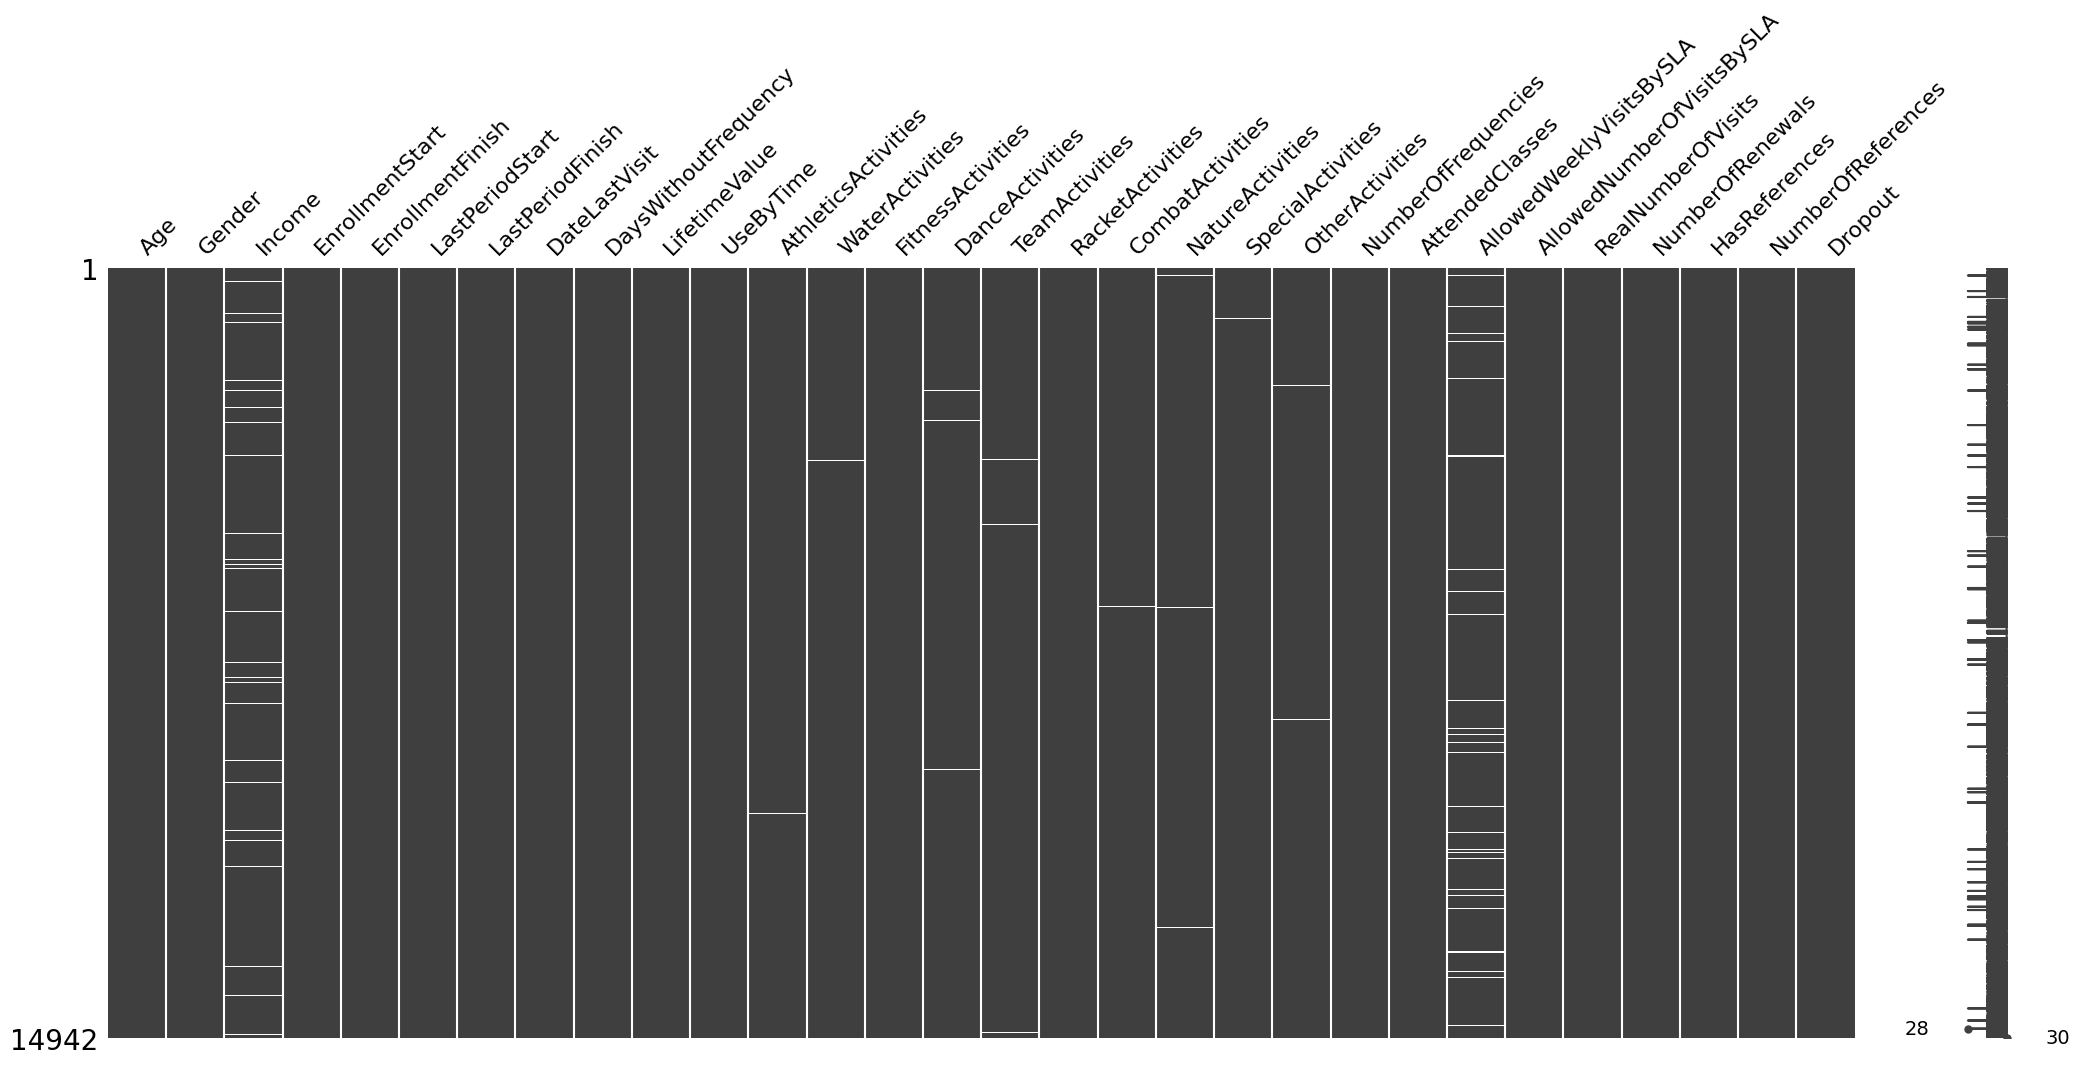

In [13]:
msno.matrix(data)

### Dealing with missing data

In [14]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data['Income'] = imputer.fit_transform(data['Income'].values.reshape(-1, 1))

In [15]:
data['AllowedWeeklyVisitsBySLA'].fillna('0', inplace=True)

<Axes: >

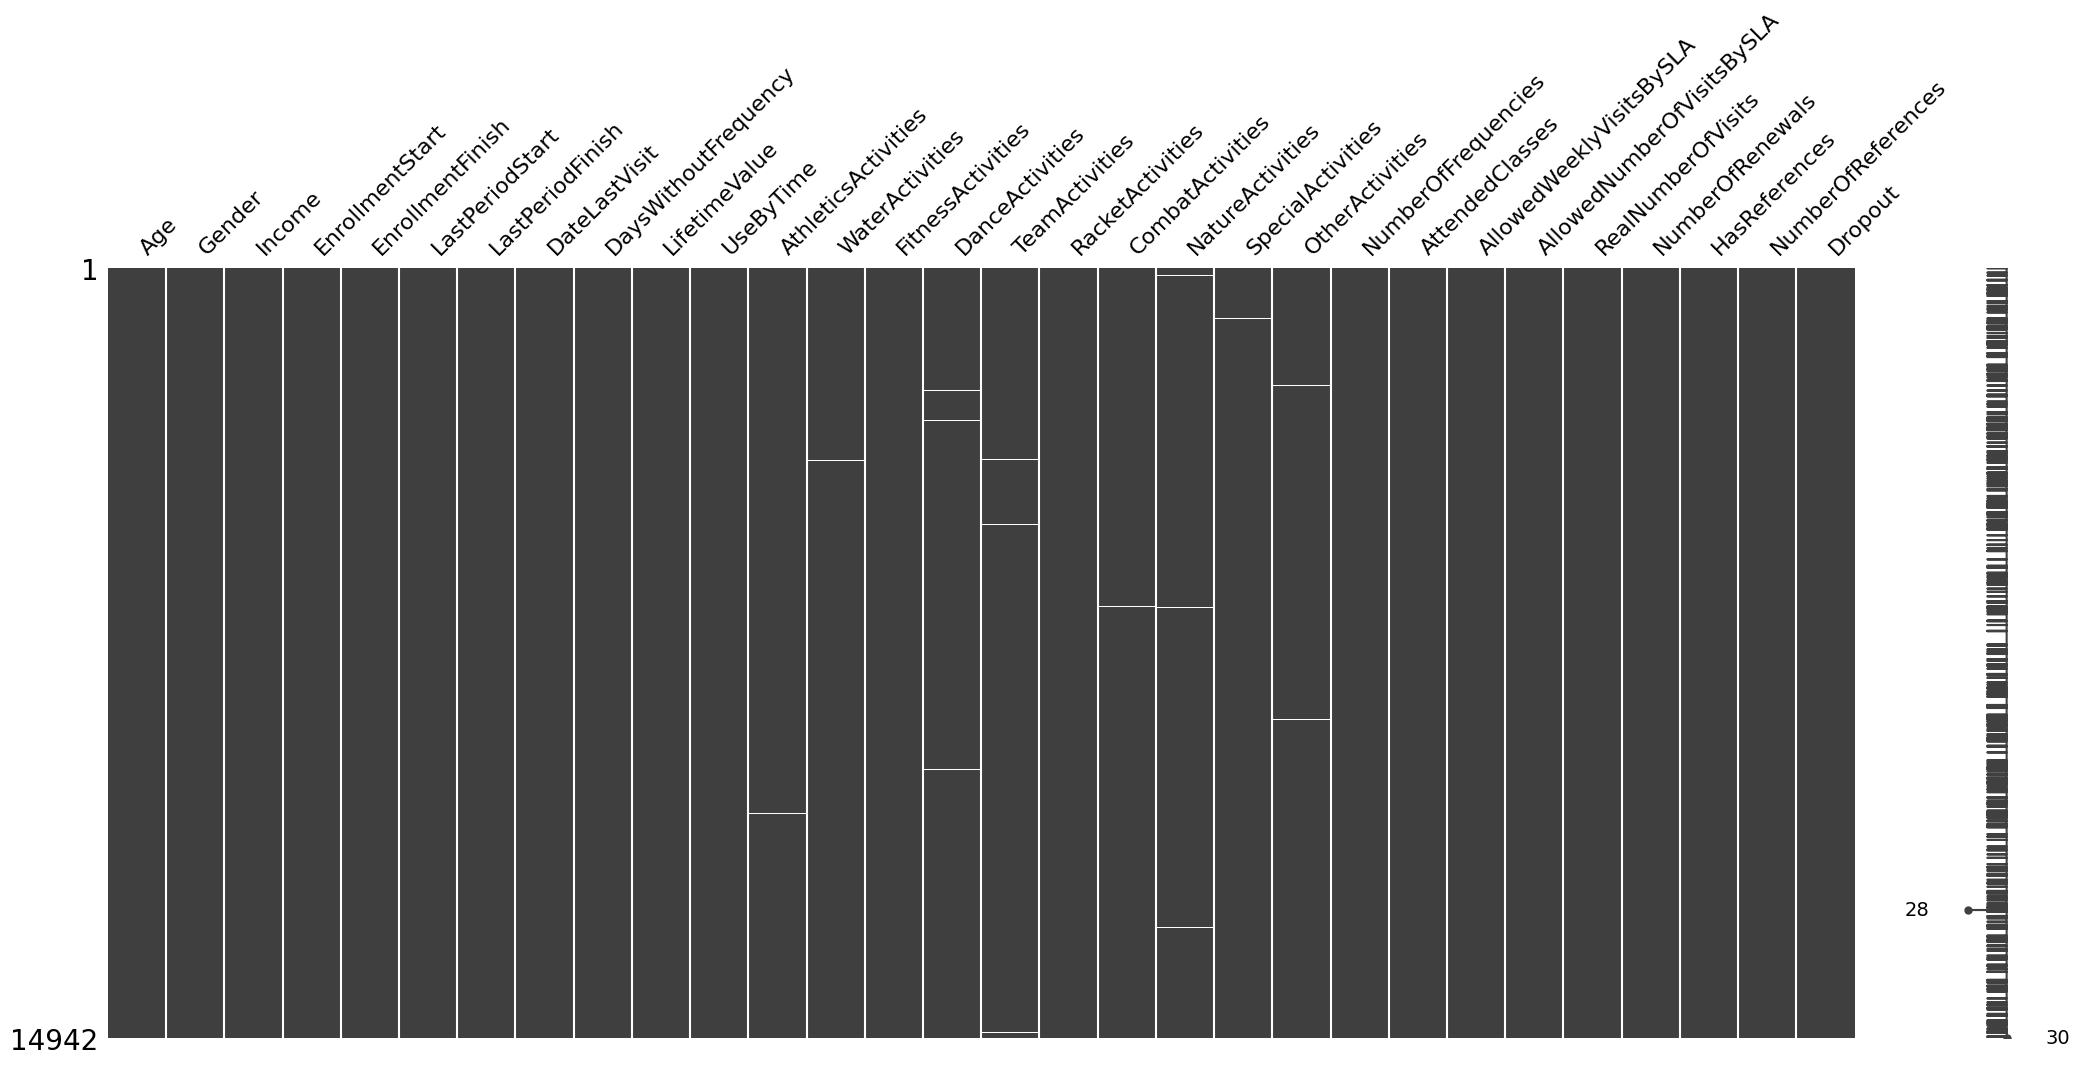

In [16]:
msno.matrix(data)

In [17]:
#dropping missing values that repesente less than 5% of the data 
threshold= len(data)*0.05
cols_to_drop = data.columns[data.isna().sum() <= threshold]
data.dropna(subset=cols_to_drop, inplace= True)
len(data)

14530

<Axes: >

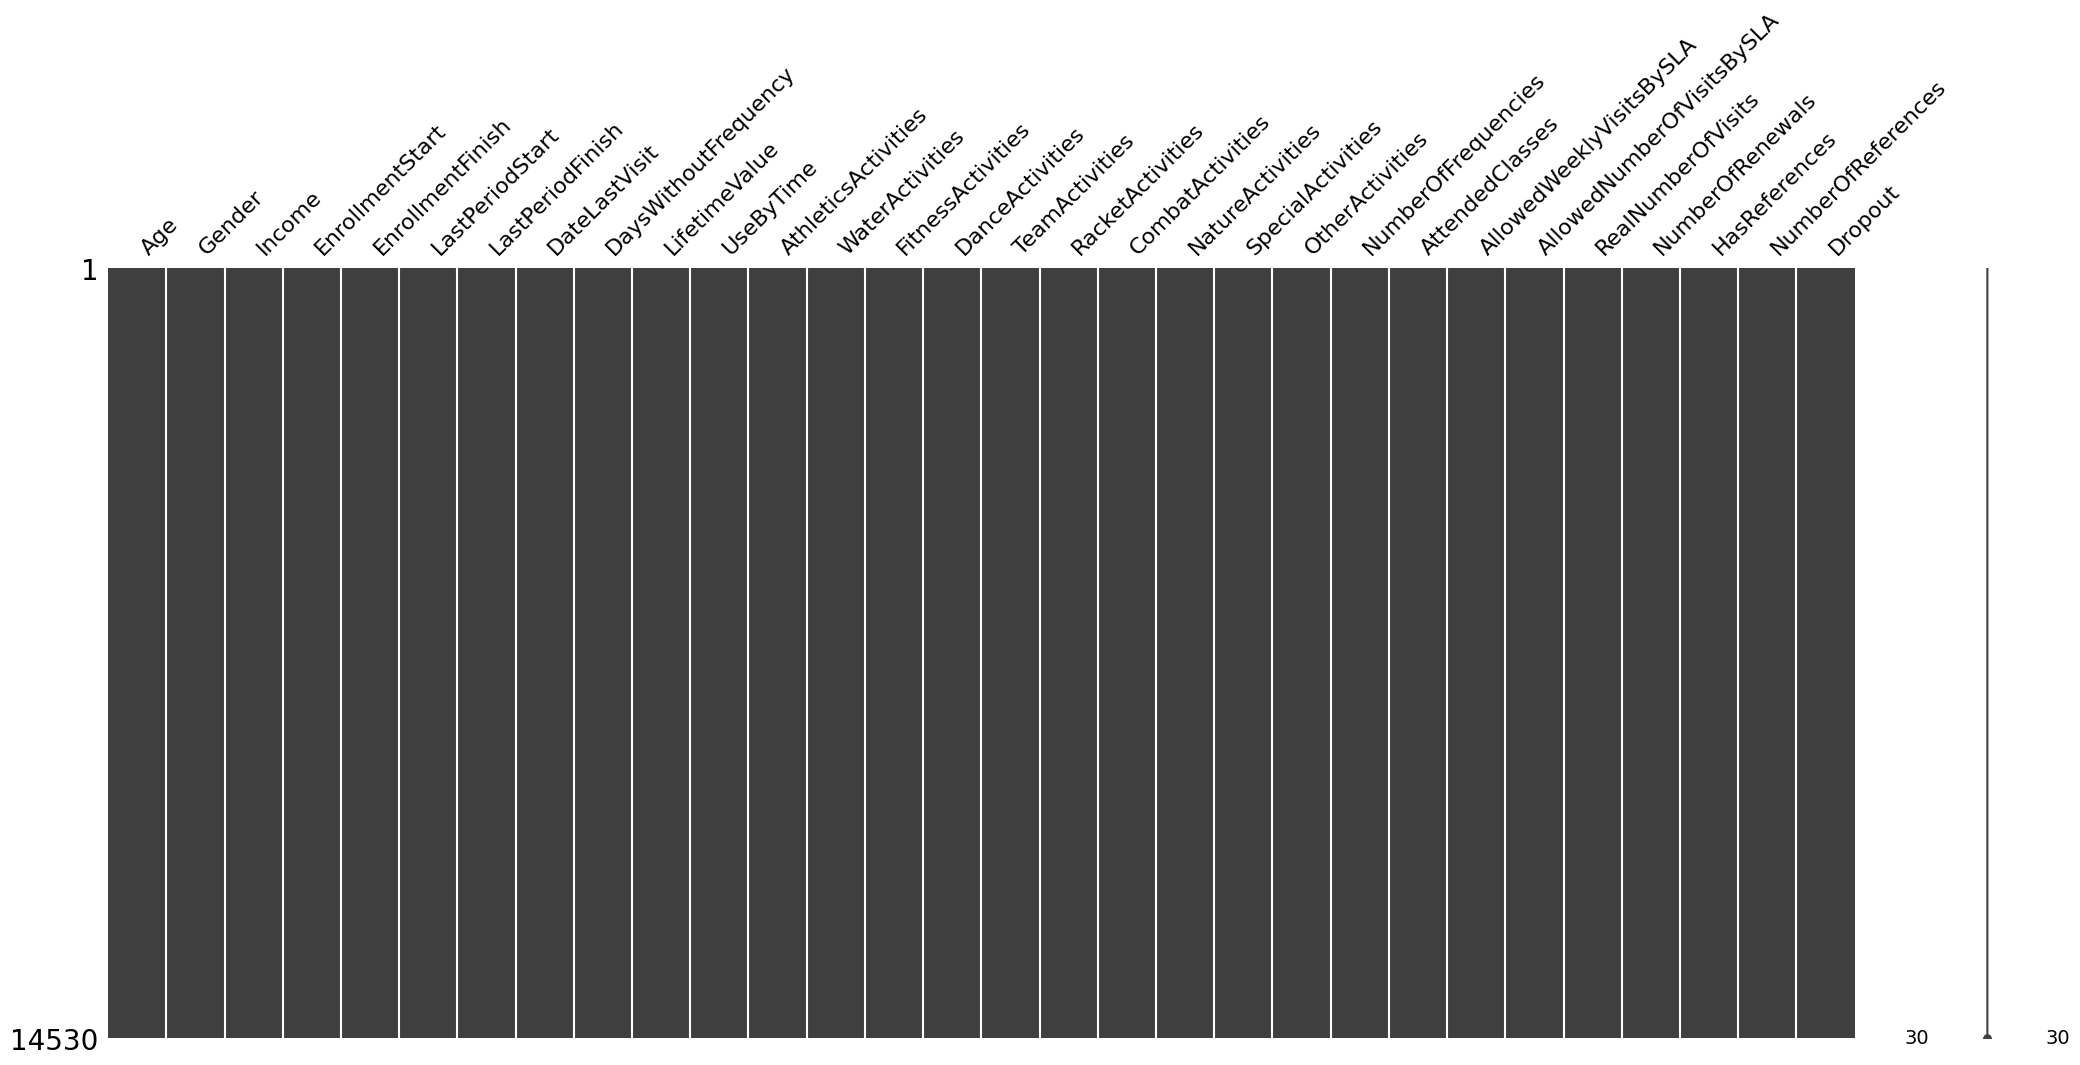

In [18]:
msno.matrix(data)

In [19]:
nr_of_rows = (len(data) / len_original_data) * 100
print('We kept', round(nr_of_rows, 2), '% of our data set.')

We kept 97.24 % of our data set.


## Outliers

In [20]:
data['AllowedWeeklyVisitsBySLA'] = data['AllowedWeeklyVisitsBySLA'].astype('int')   # tive de por aqui se não não fazia as boxplots

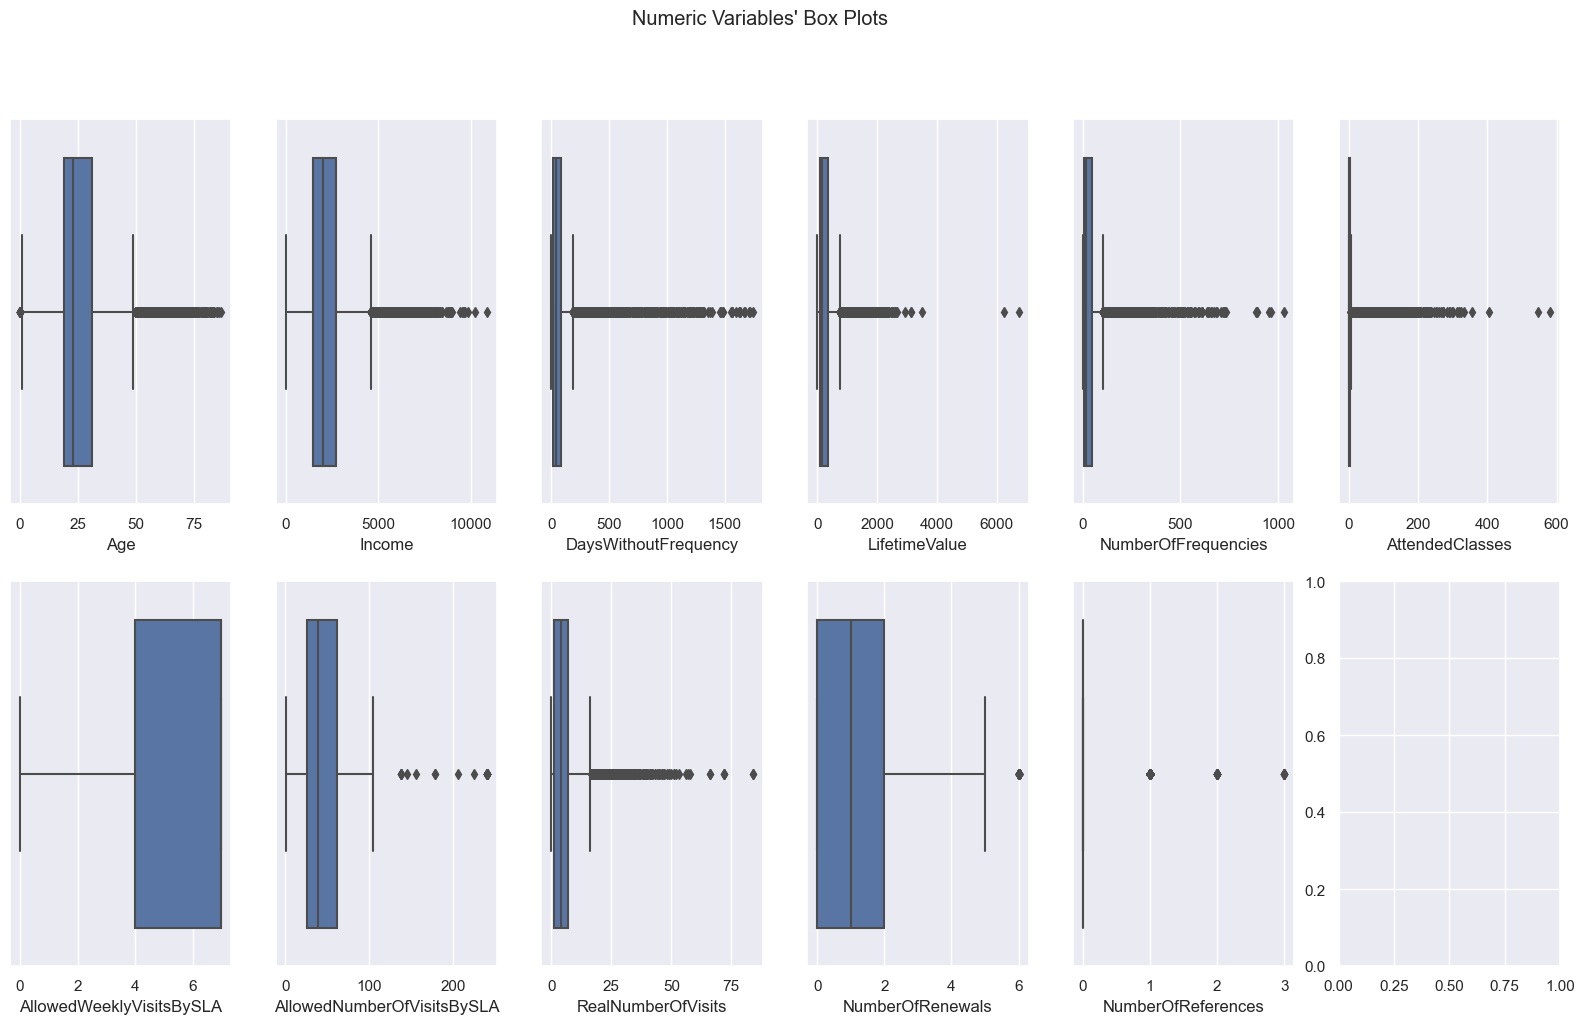

In [21]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

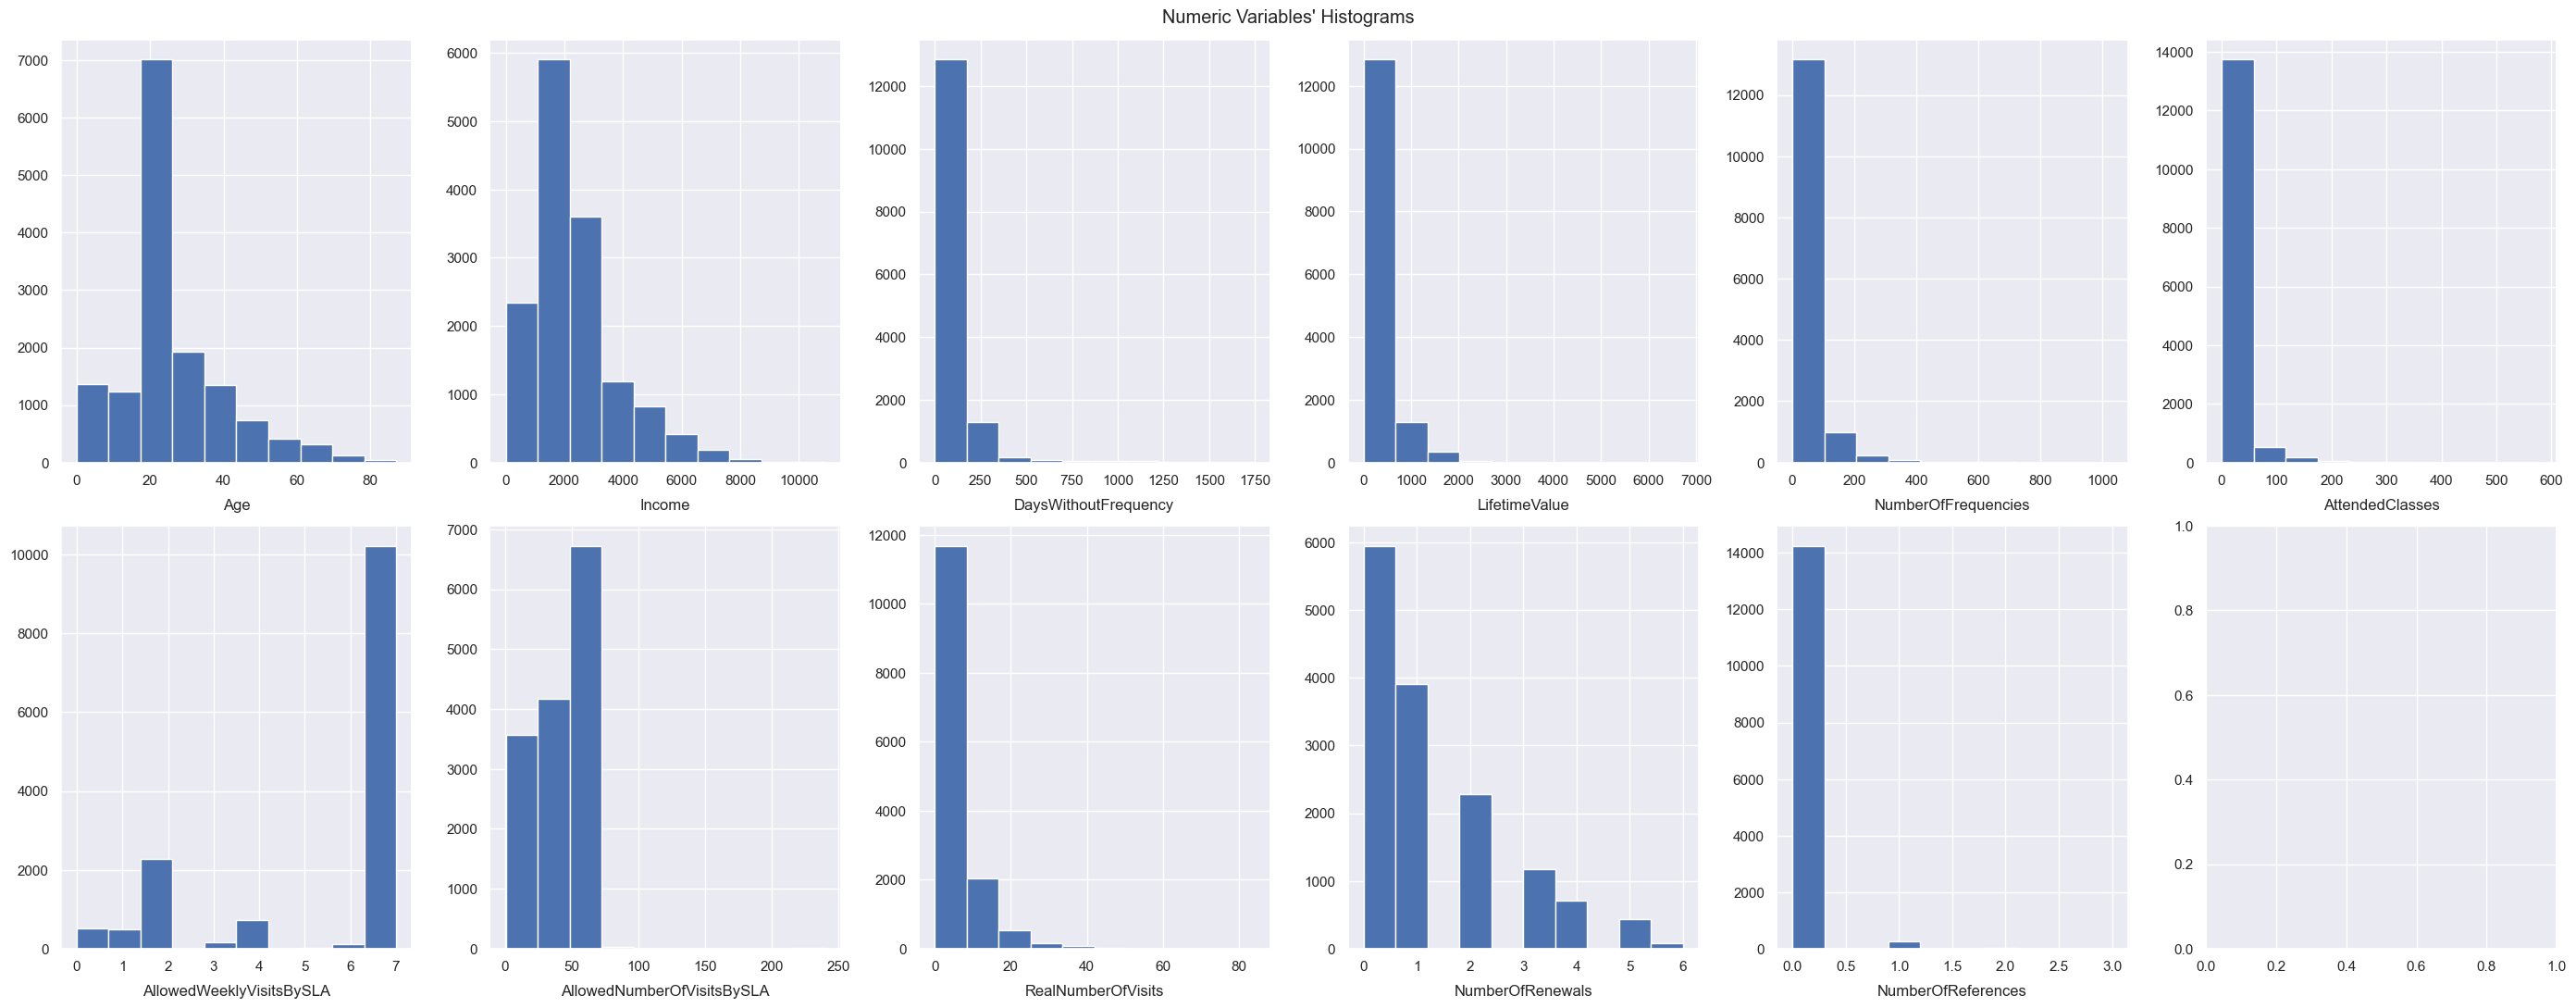

In [22]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(28, 11)) #give me some plots with 2 rows and the size 20, 11

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(data[feat])
    ax.set_title(feat, y=-0.13) 
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.tight_layout()
plt.show()

### Removing Outliers

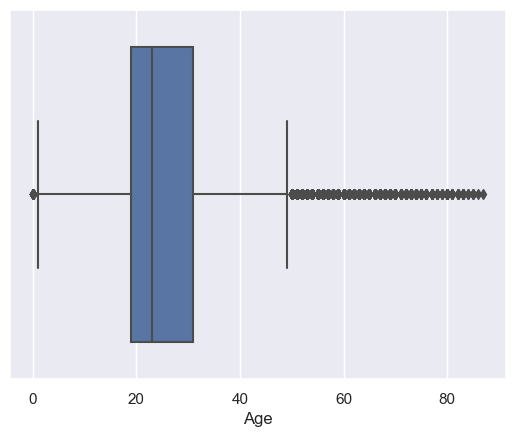

In [23]:
sns.boxplot(x=data['Age'])
plt.show()

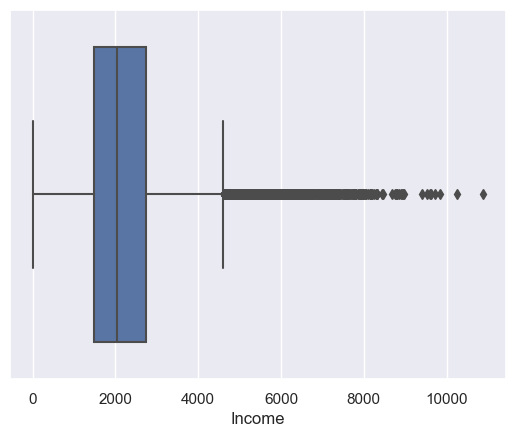

In [24]:
sns.boxplot(x=data['Income'])
plt.show()

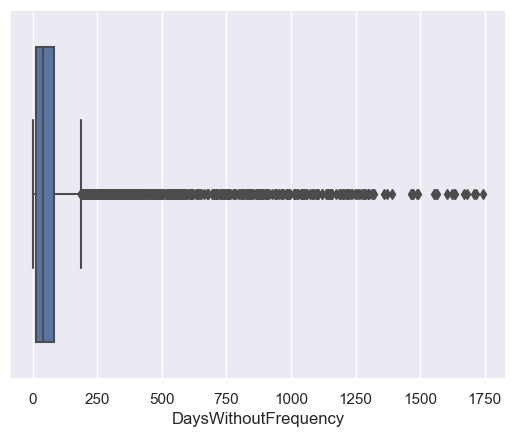

In [25]:
sns.boxplot(x=data['DaysWithoutFrequency'])
plt.show()

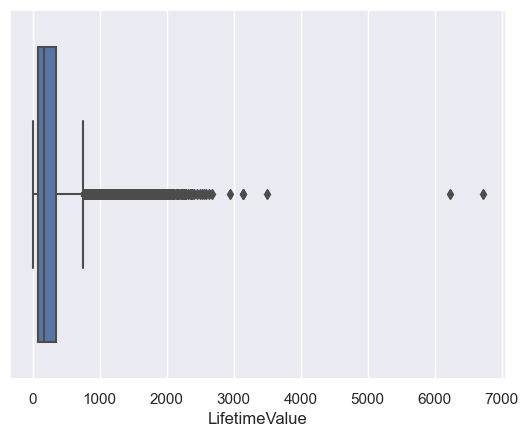

In [26]:
sns.boxplot(x=data['LifetimeValue'])
plt.show()

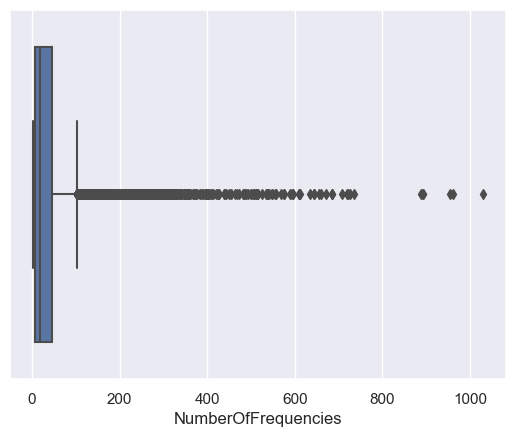

In [27]:
sns.boxplot(x=data['NumberOfFrequencies'])
plt.show()

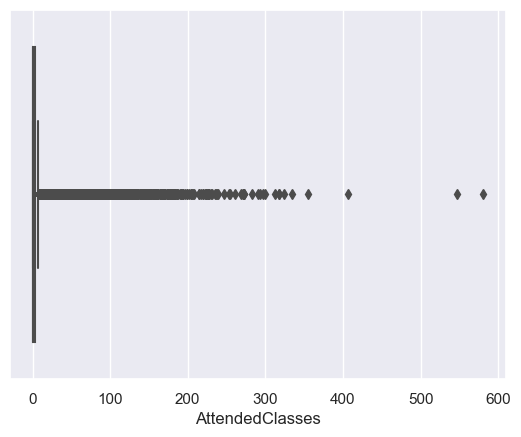

In [28]:
sns.boxplot(x=data['AttendedClasses'])
plt.show()

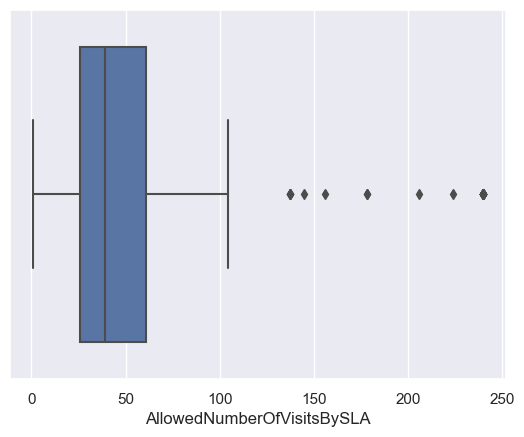

In [29]:
sns.boxplot(x=data['AllowedNumberOfVisitsBySLA'])
plt.show()

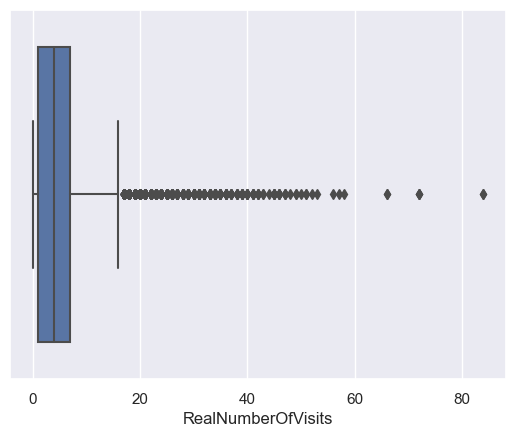

In [30]:
sns.boxplot(x=data['RealNumberOfVisits'])
plt.show()

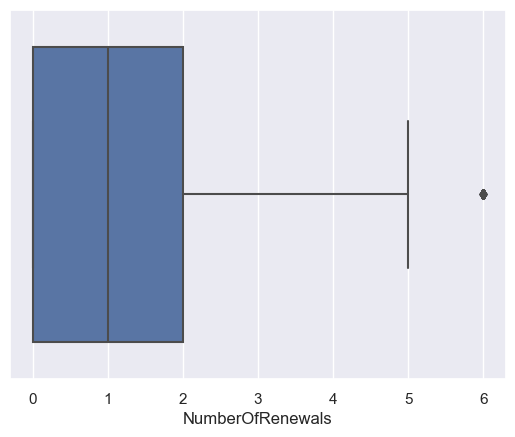

In [31]:
sns.boxplot(x=data['NumberOfRenewals'])
plt.show()

In [32]:
#by hand based on the boxplots
filters1 = (
    (data['Age']<=80)
    &
    (data['Income']<=8000)
    &
    (data['DaysWithoutFrequency']<=1400)
    &
    (data['LifetimeValue']<=2000)
    &
    (data['NumberOfFrequencies']<=750)
    &
    (data['AttendedClasses']<=300)
    &
    (data['AllowedNumberOfVisitsBySLA']<=120)
    &
    (data['RealNumberOfVisits']<=60)
    &
    (data['NumberOfRenewals']<6)
)

data_old = data
data= data_old[filters1]

print('Percentage of data kept after removing outliers:', np.round(data.shape[0] / data_old.shape[0], 4))

Percentage of data kept after removing outliers: 0.9831


In [33]:
data.head()

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10000   60  Female  5500.0      2019-09-03       2019-10-31      2019-07-01   
10001   29  Female  2630.0      2014-08-12       2015-09-14      2015-01-01   
10002   23    Male  1980.0      2017-05-02       2017-06-01      2017-01-01   
10003    9    Male     0.0      2018-09-05       2019-02-12      2018-07-01   
10005   24  Female  2220.0      2015-12-01       2016-07-31      2016-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10000       2019-12-31    2019-10-30                     1          89.35   
10001       2015-12-31    2015-07-16                    60         479.20   
10002       2017-06-30    2017-05-25                     7          37.60   
10003       2019-06-30    2019-01-21                    22         155.40   
10005       2016-12-31    2016-07-28                     3         140.00   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
10000  ...              0.0                  9.0                7   
10001  ...              0.0                 23.0                1   
10002  ...              0.0                  6.0                0   
10003  ...              0.0                 20.0                2   
10005  ...              0.0                 28.0                0   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10000                         0                        6.28   
10001                         2                       17.42   
10002                         7                       30.03   
10003                         2                       17.72   
10005                         7                       59.01   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10000                   2                 0            0.0   
10001                   1                 2            0.0   
10002                   6                 0            0.0   
10003                   3                 0            0.0   
10005                  26                 0            0.0   

       NumberOfReferences  Dropout  
ID                                  
10000                   0        0  
10001                   0        1  
10002                   0        1  
10003                   0        1  
10005                   0        1  

[5 rows x 30 columns]

#### View the result of the manual removal of the outliers

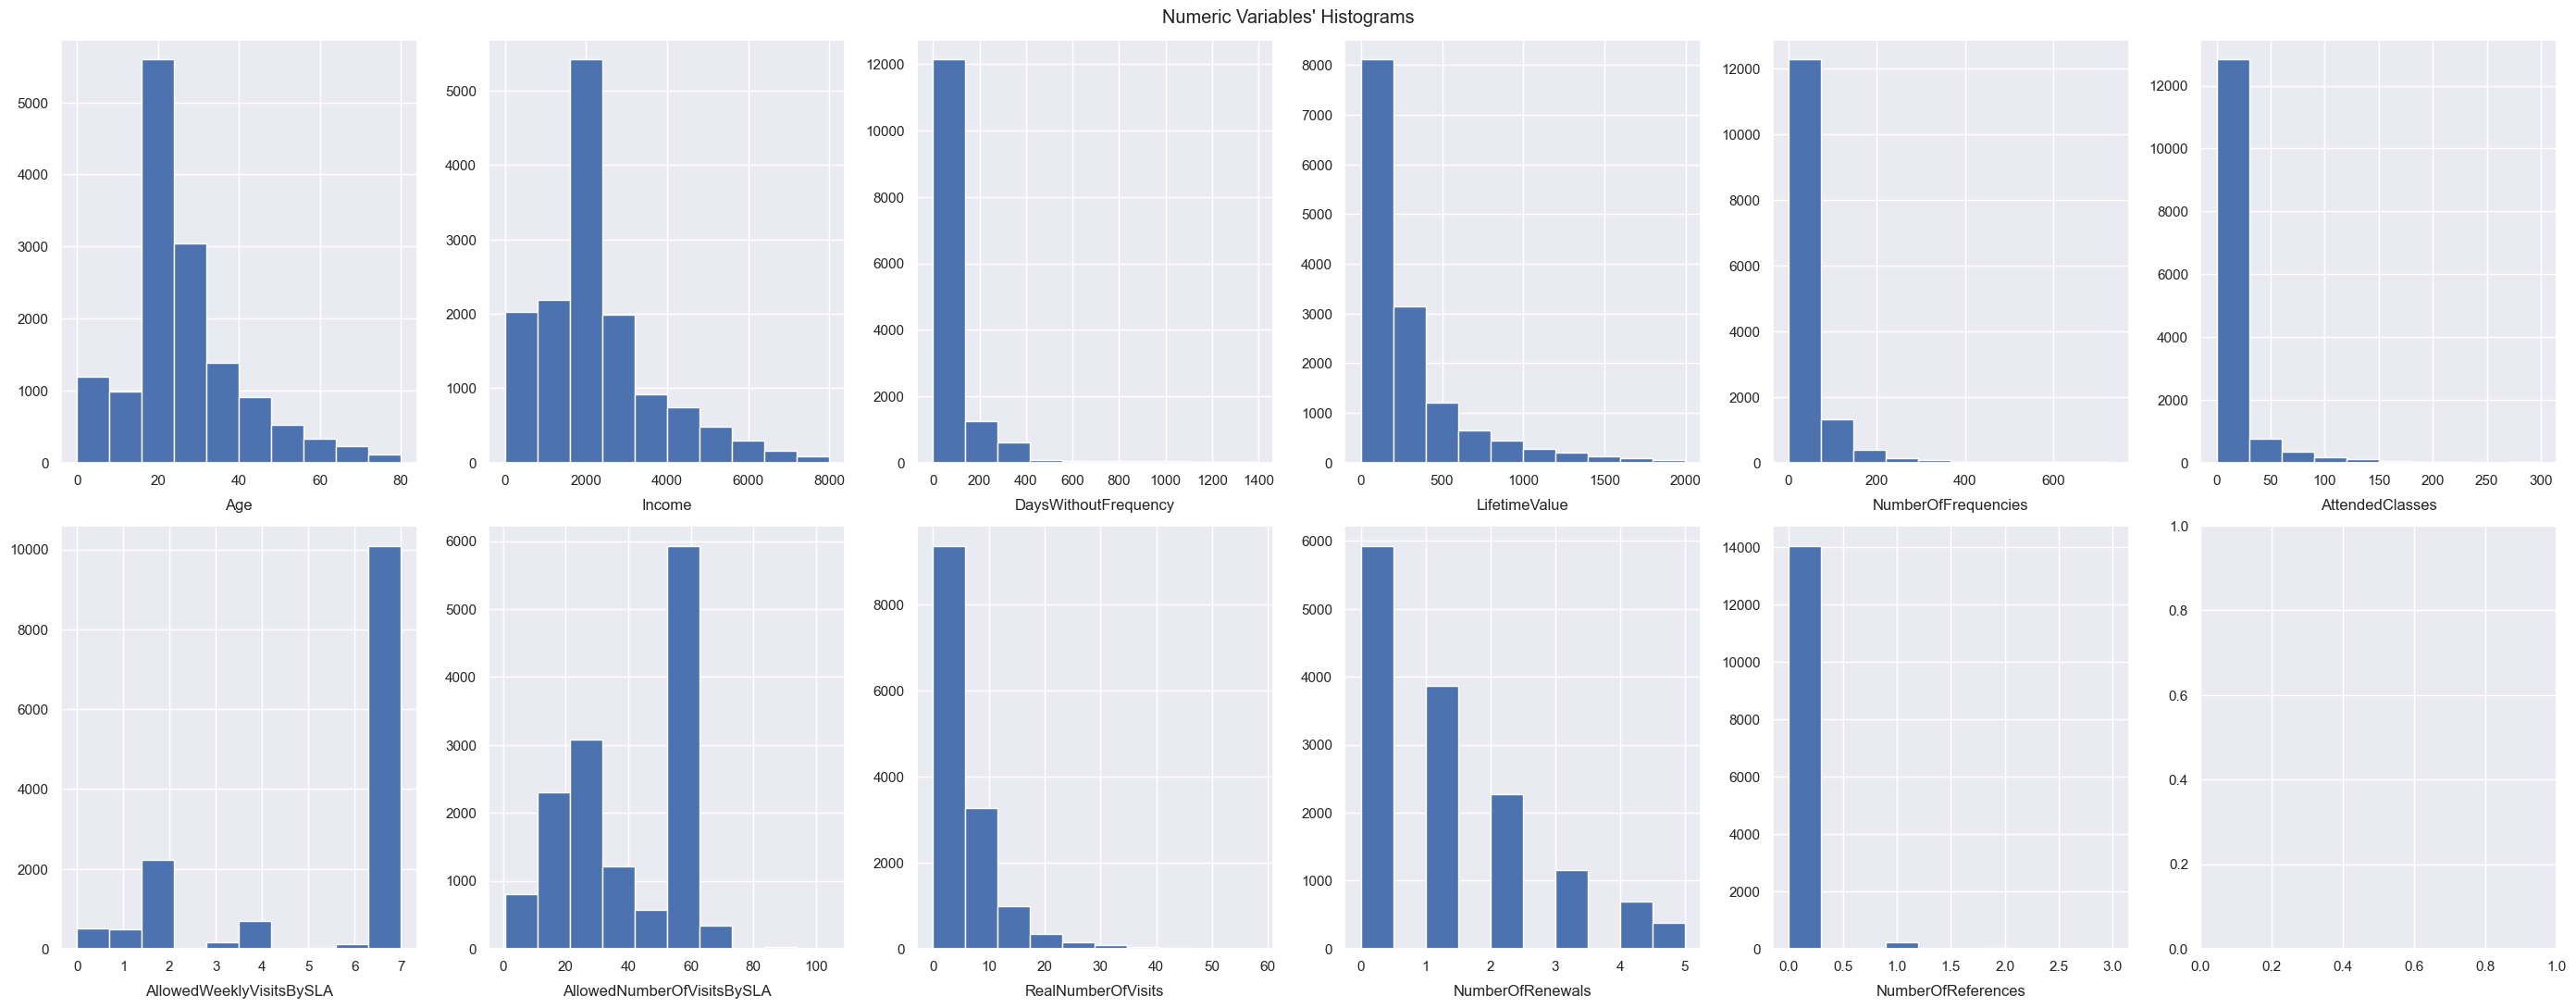

In [34]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(28, 11)) #give me some plots with 2 rows and the size 20, 11

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(data[feat])
    ax.set_title(feat, y=-0.13) 
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.tight_layout()
plt.show()

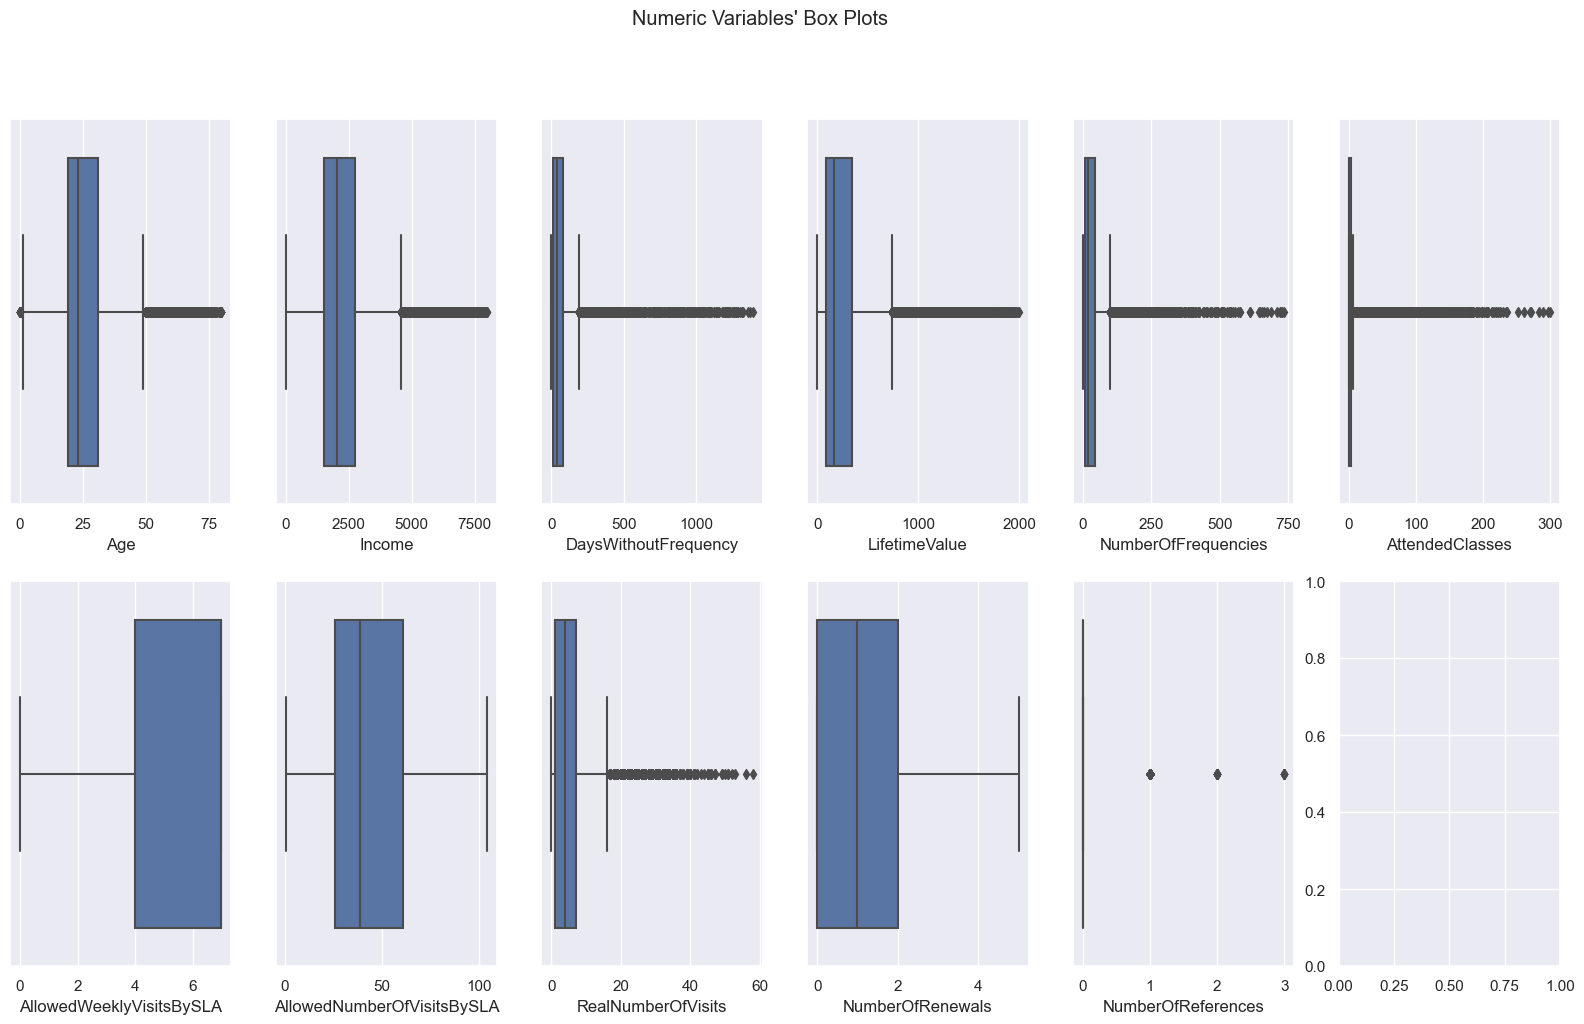

In [35]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

# Feature Engineering

In [36]:
date_columns = ['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit']
data[date_columns] = data[date_columns].apply(pd.to_datetime)

In [37]:
# data['AllowedWeeklyVisitsBySLA'] = data['AllowedWeeklyVisitsBySLA'].astype('int')  está la em cima, tenho de decidir o que fazer com isto

In [38]:
data['HasReferences'].unique()
data['HasReferences'].value_counts()

HasReferences
0.0    14027
1.0      257
Name: count, dtype: int64

In [39]:
data['HasReferences'] = np.where(data['HasReferences'] == 1.0, 1, 0)
data['HasReferences'].value_counts()

HasReferences
0    14027
1      257
Name: count, dtype: int64

In [40]:
new_column_names = {'AthleticsActivities': 'Athletics', 
                    'WaterActivities': 'Water',
                    'FitnessActivities': 'Fitness',
                    'DanceActivities': 'Dance',
                    'TeamActivities': 'Team',
                    'RacketActivities': 'Racket',
                    'CombatActivities': 'Combat',
                    'NatureActivities': 'Nature',
                    'SpecialActivities': 'Special',
                    'OtherActivities': 'Other',
                   }
data = data.rename(columns=new_column_names)


### Create new variables

In [41]:
'''def age_group(age):
    if age <= 10:
        return 'Child'
    elif 10 < age <= 18:
        return 'Teen'
    elif 18 < age <= 35:
        return 'Young adult'
    elif 35 < age <= 65:
        return 'Adult'
    else:
        return 'Elderly'

data['Age_group'] = data['Age'].apply(age_group)
data['Age_group']'''

"def age_group(age):\n    if age <= 10:\n        return 'Child'\n    elif 10 < age <= 18:\n        return 'Teen'\n    elif 18 < age <= 35:\n        return 'Young adult'\n    elif 35 < age <= 65:\n        return 'Adult'\n    else:\n        return 'Elderly'\n\ndata['Age_group'] = data['Age'].apply(age_group)\ndata['Age_group']"

In [42]:
def age_group_to_numeric(age):
    if age <= 10:
        return 0
    elif 10 < age <= 18:
        return 1
    elif 18 < age <= 35:
        return 2
    elif 35 < age <= 65:
        return 3
    else:
        return 4  

data['Age_group_numeric'] = data['Age'].apply(age_group_to_numeric)

In [43]:
data.drop(columns='Age', inplace = True)

In [44]:
data['Gender_binary'] = np.where(data['Gender']== 'Male',0,1)
# Male = 0 | Female = 1

In [45]:
data.drop(columns='Gender', inplace = True)

In [46]:
data['EnrollmentTime'] = ((data['EnrollmentFinish'] - data['EnrollmentStart']).dt.days).astype(int)
data['EnrollmentTime'] 

ID
10000      58
10001     398
10002      30
10003     160
10005     243
         ... 
24937       0
24938     261
24939      30
24940       0
24941    1166
Name: EnrollmentTime, Length: 14284, dtype: int32

In [47]:
# criar uma variavel que é a soma das atividades que ele ja esteve inscrito
activaties = ['Athletics',
       'Water', 'Fitness', 'Dance', 'Team', 'Racket', 'Combat', 'Nature',
       'Special', 'Other']

data['NumberOfActivities'] = data[activaties].sum(axis = 1)

In [48]:
# valor gasto em media por ano pelos clientes
data['AvgLifeTimeValuePerYear'] = round( data['LifetimeValue'] / (data['EnrollmentTime'] / 365), 2)
data['AvgLifeTimeValuePerYear'] = data['AvgLifeTimeValuePerYear'].replace(np.inf,0) #replacing the result where inf (infinity) appeared with 0


In [49]:
data['AvgLifeTimeValuePerYear']  # Inf, não sei como tratar deste valor?????

ID
10000    562.29
10001    439.47
10002    457.47
10003    354.51
10005    210.29
          ...  
24937      0.00
24938    480.86
24939    530.47
24940      0.00
24941    287.87
Name: AvgLifeTimeValuePerYear, Length: 14284, dtype: float64

In [50]:
data['EnrolmentPeriodFinishYear'] = (data['EnrollmentFinish'].dt.year).astype(int)
data['EnrolmentPeriodYear'] = (data['EnrollmentStart'].dt.year).astype(int)

In [51]:
data.dtypes

Income                               float64
EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                   int64
LifetimeValue                        float64
UseByTime                              int64
Athletics                            float64
Water                                float64
Fitness                              float64
Dance                                float64
Team                                 float64
Racket                               float64
Combat                               float64
Nature                               float64
Special                              float64
Other                                float64
NumberOfFrequencies                  float64
AttendedClasses                        int64
AllowedWeeklyVisitsBySLA               int32
AllowedNum

In [52]:
data.columns

Index(['Income', 'EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart',
       'LastPeriodFinish', 'DateLastVisit', 'DaysWithoutFrequency',
       'LifetimeValue', 'UseByTime', 'Athletics', 'Water', 'Fitness', 'Dance',
       'Team', 'Racket', 'Combat', 'Nature', 'Special', 'Other',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'Age_group_numeric',
       'Gender_binary', 'EnrollmentTime', 'NumberOfActivities',
       'AvgLifeTimeValuePerYear', 'EnrolmentPeriodFinishYear',
       'EnrolmentPeriodYear'],
      dtype='object')

In [54]:
new_metric_features = ['Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies', 'AttendedClasses','AllowedWeeklyVisitsBySLA', 
                       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',  'NumberOfReferences', 'EnrollmentTime',
                       'NumberOfActivities', 'AvgLifeTimeValuePerYear','EnrolmentPeriodFinishYear', 'EnrolmentPeriodYear']


new_non_metric_features = list(data.columns.drop(new_metric_features))

### Visualization

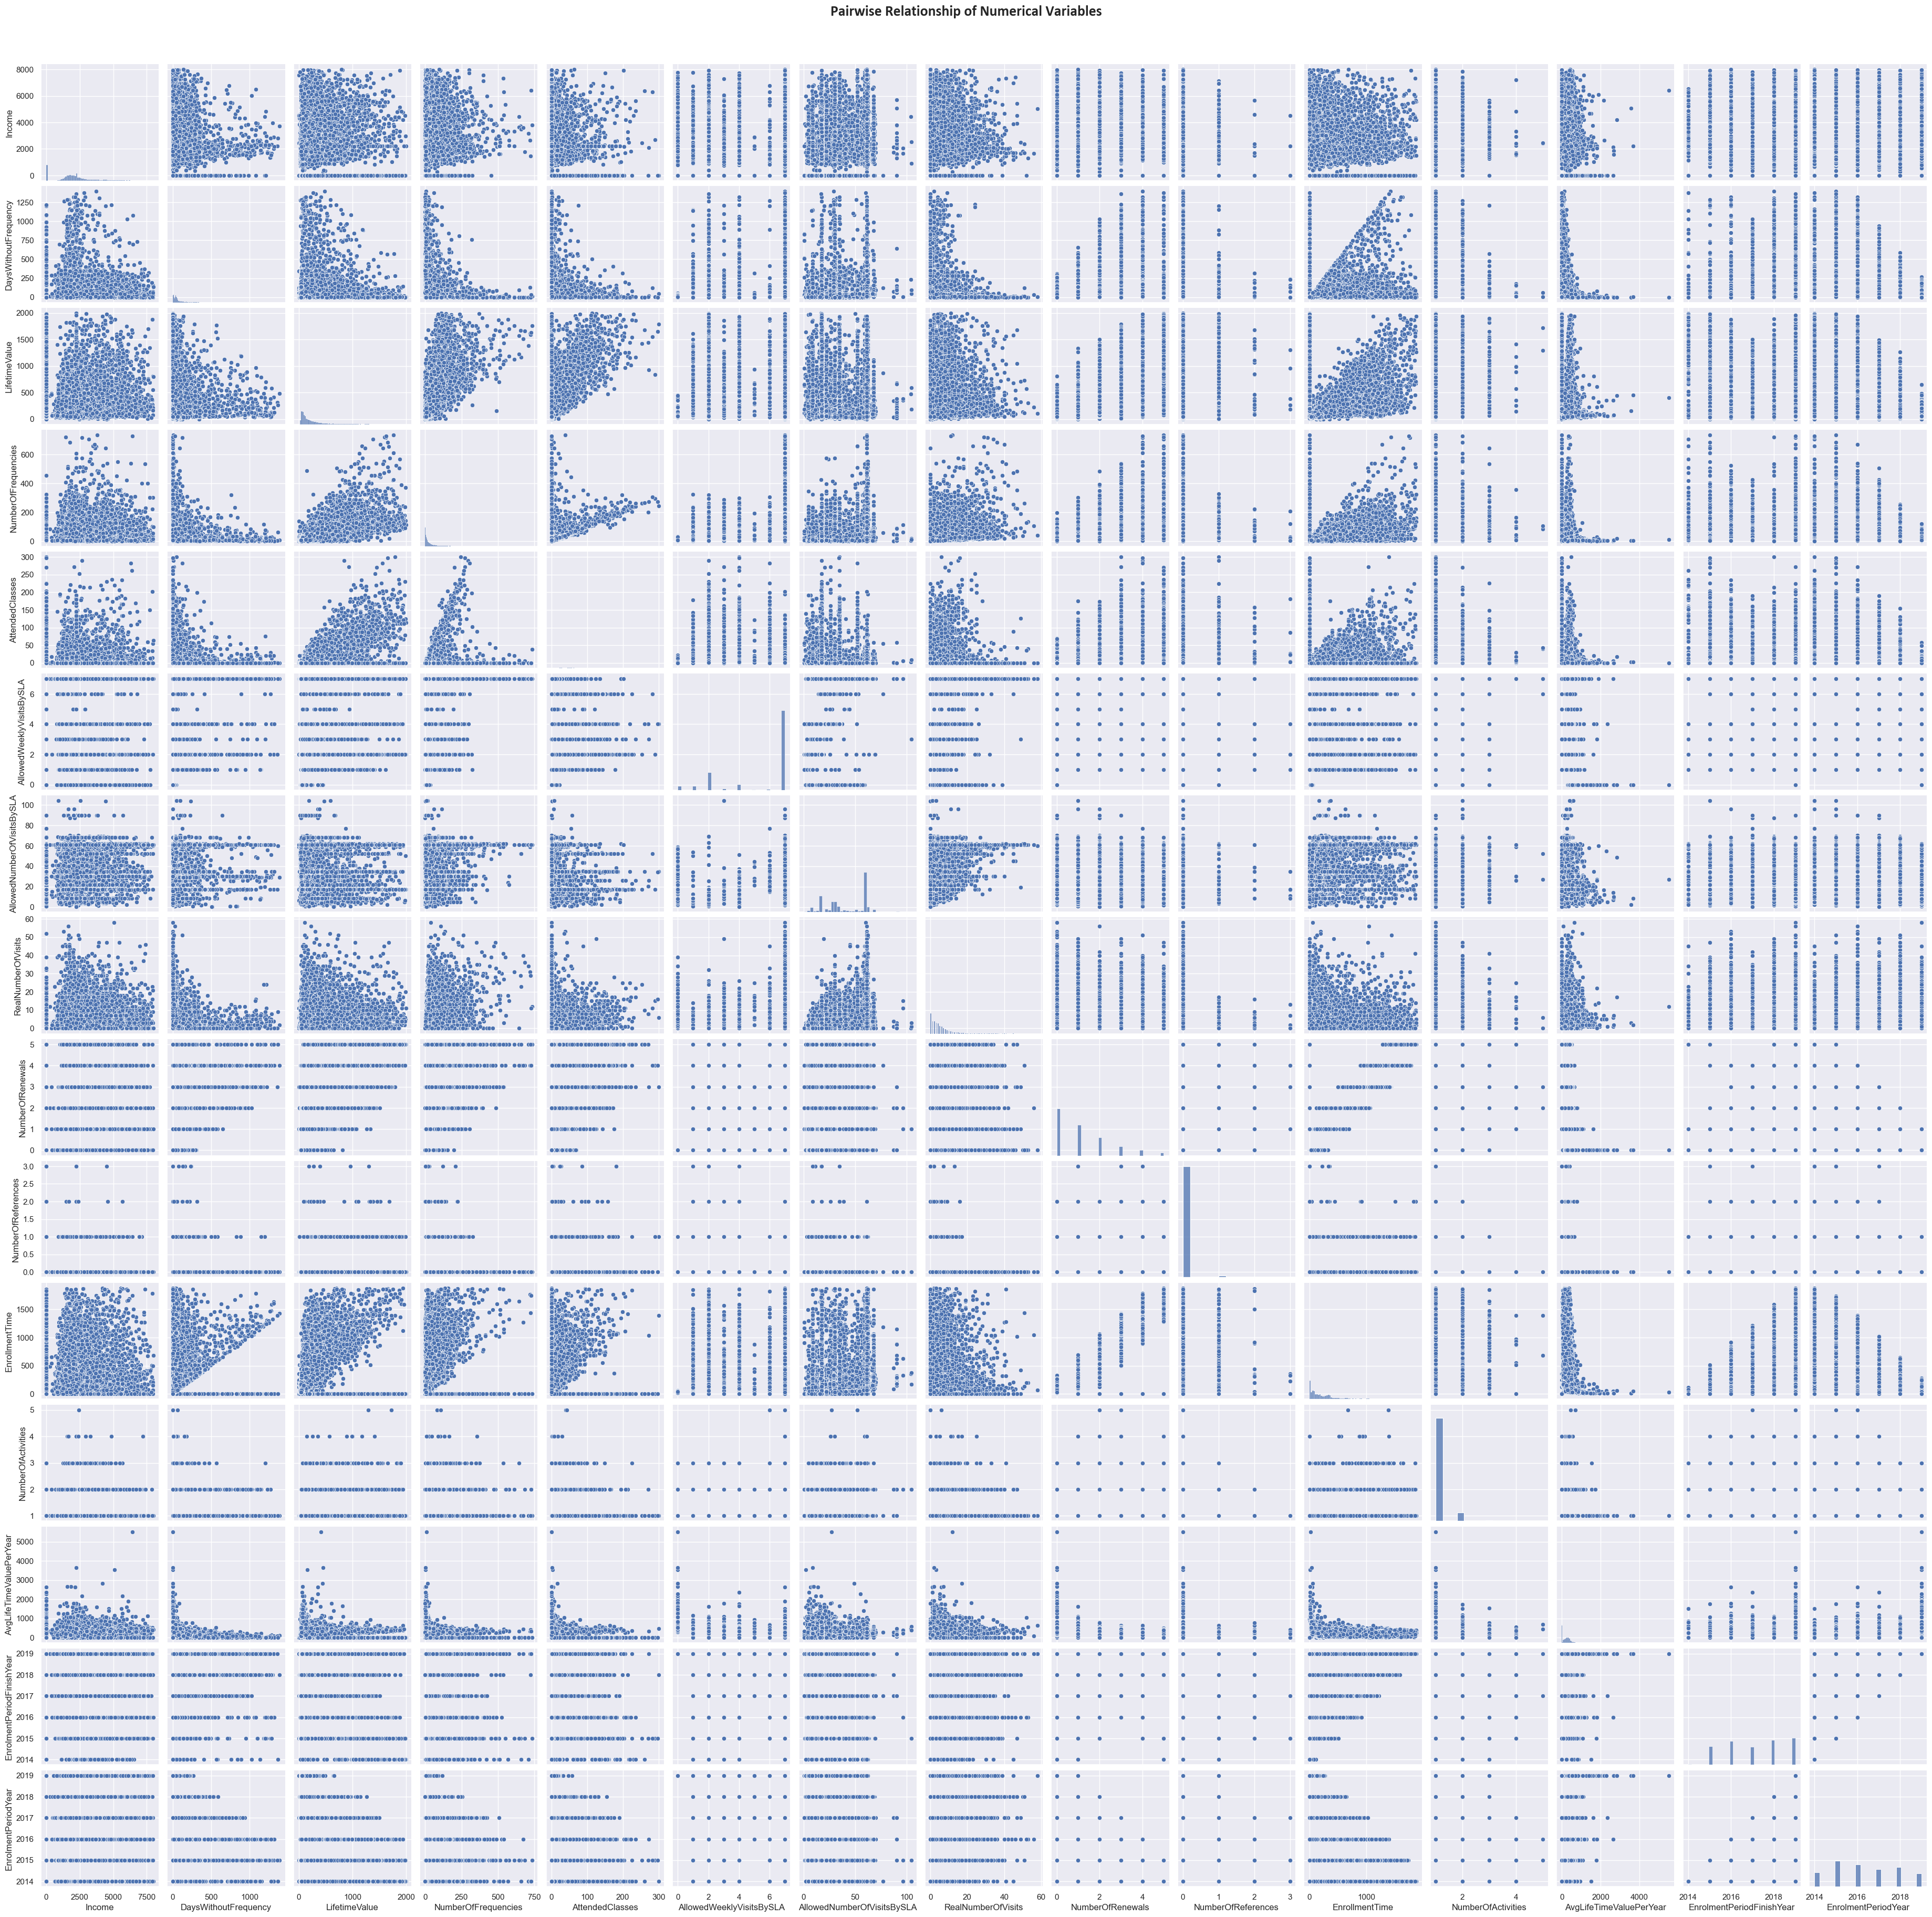

In [55]:

#Pairwise Relationship of Numerical Variables
palette = sns.light_palette("seagreen", as_cmap=True)
sns.set()

# Setting pairplot
sns.pairplot(data[new_metric_features], palette='#31a354', diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20, family='Calibri', weight='bold')

plt.show()

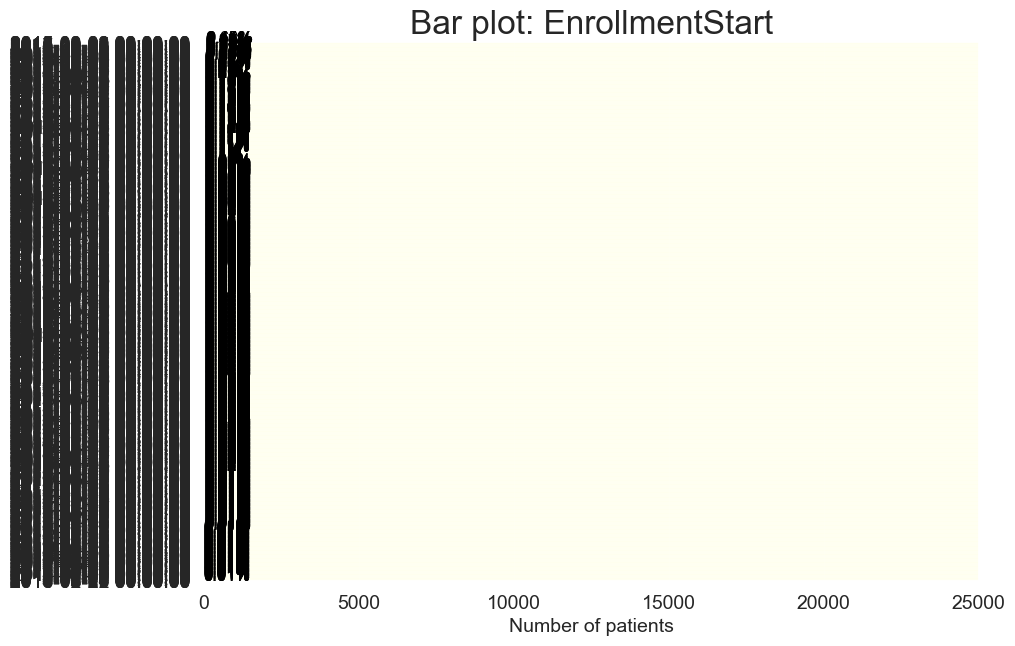

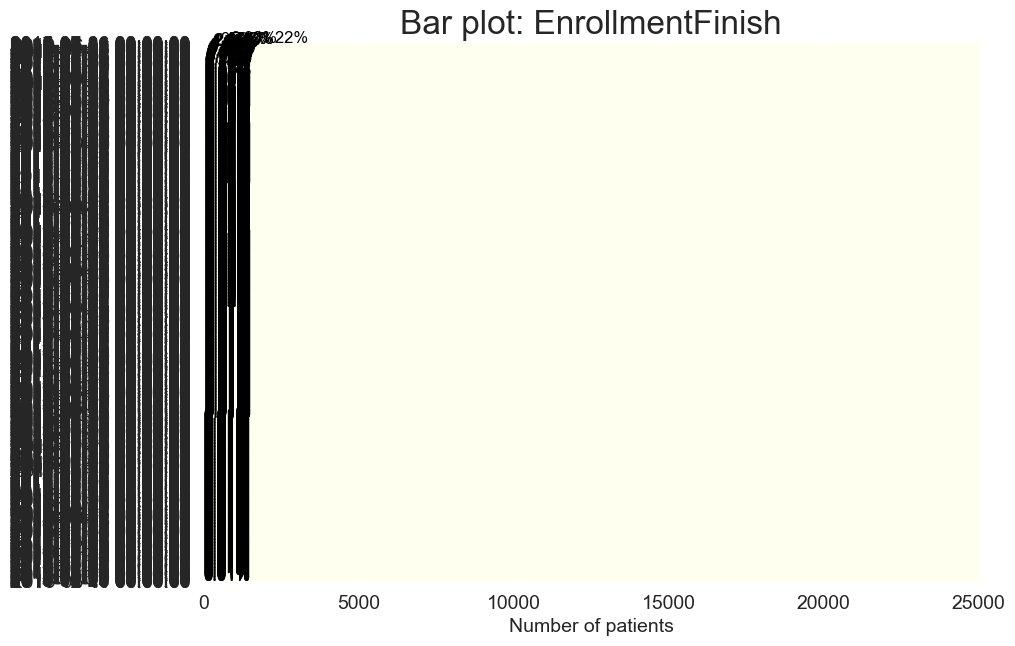

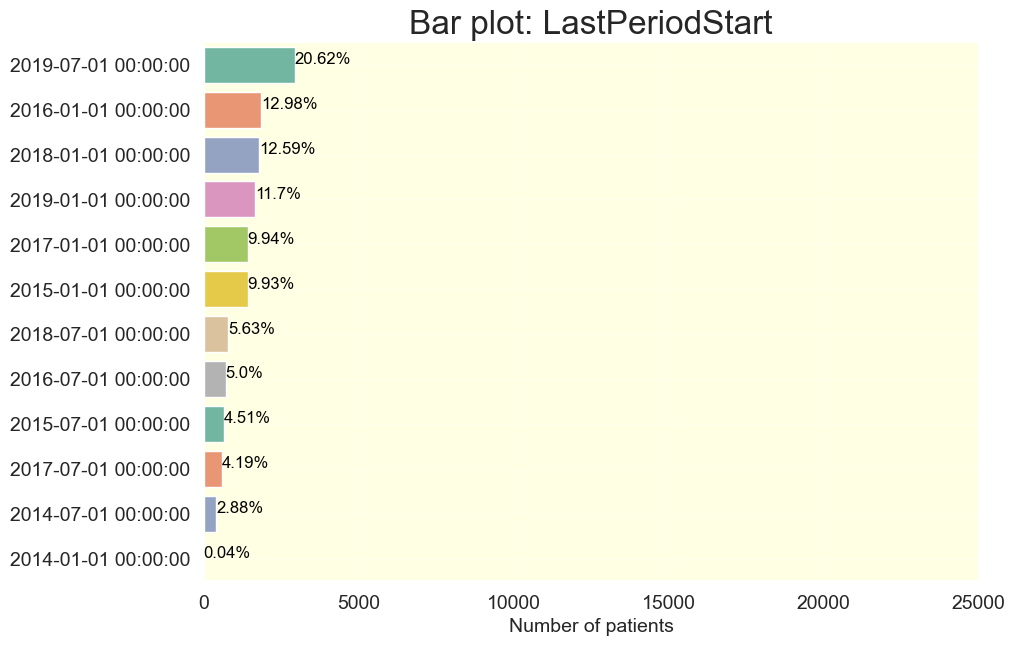

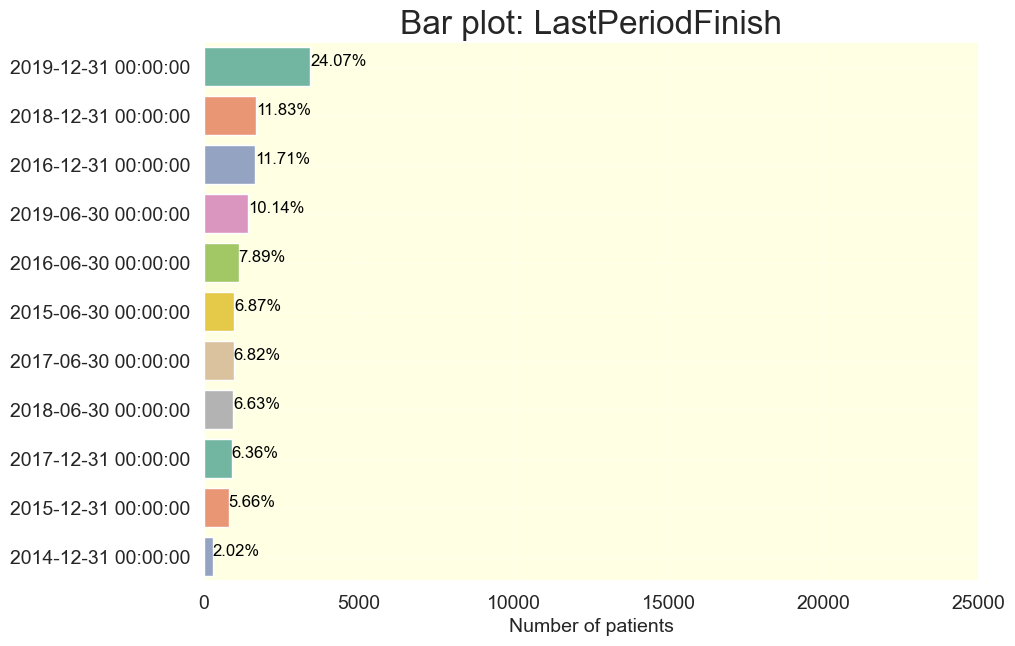

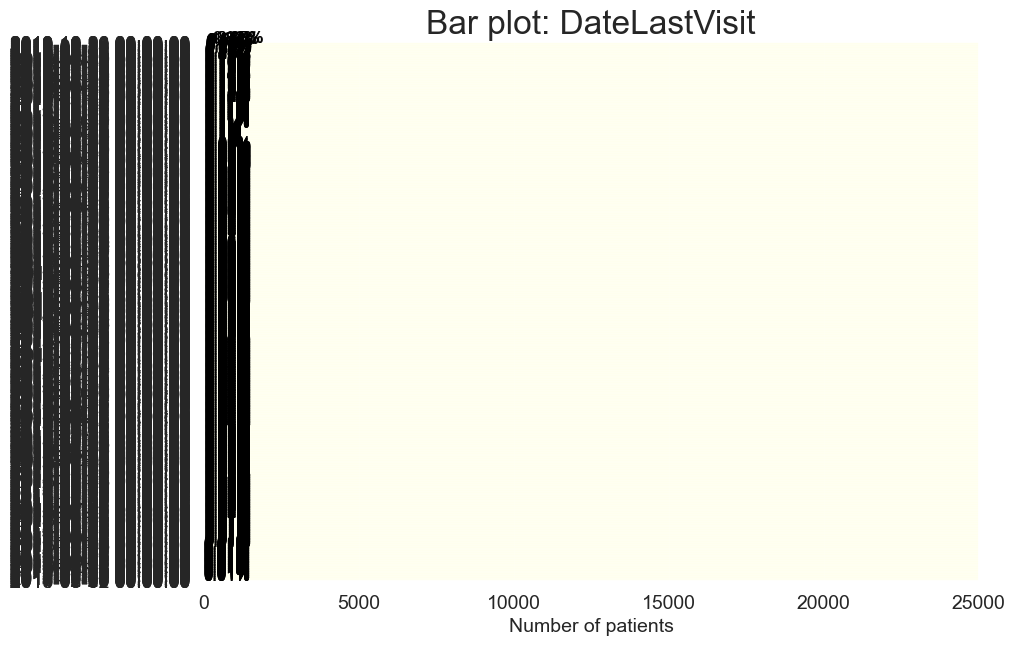

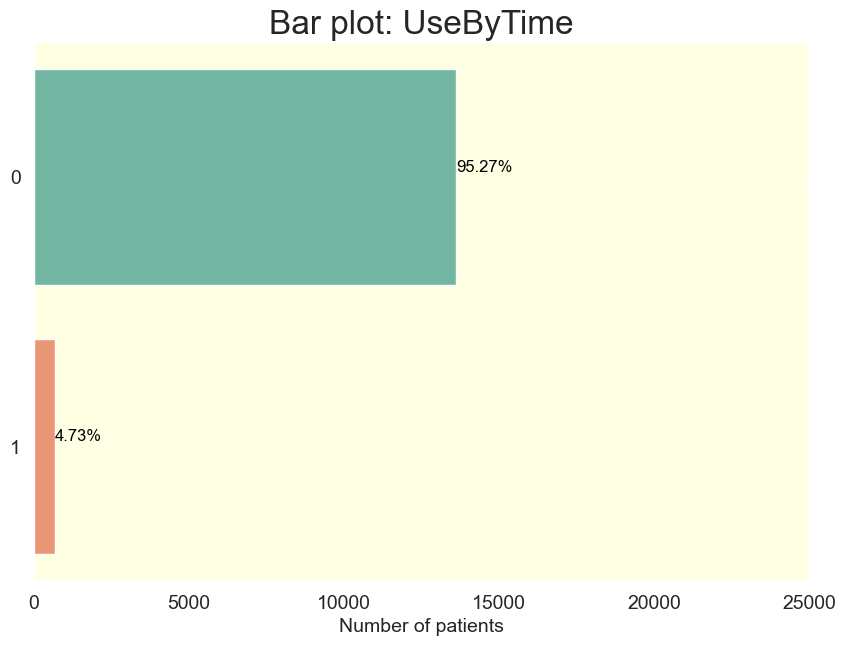

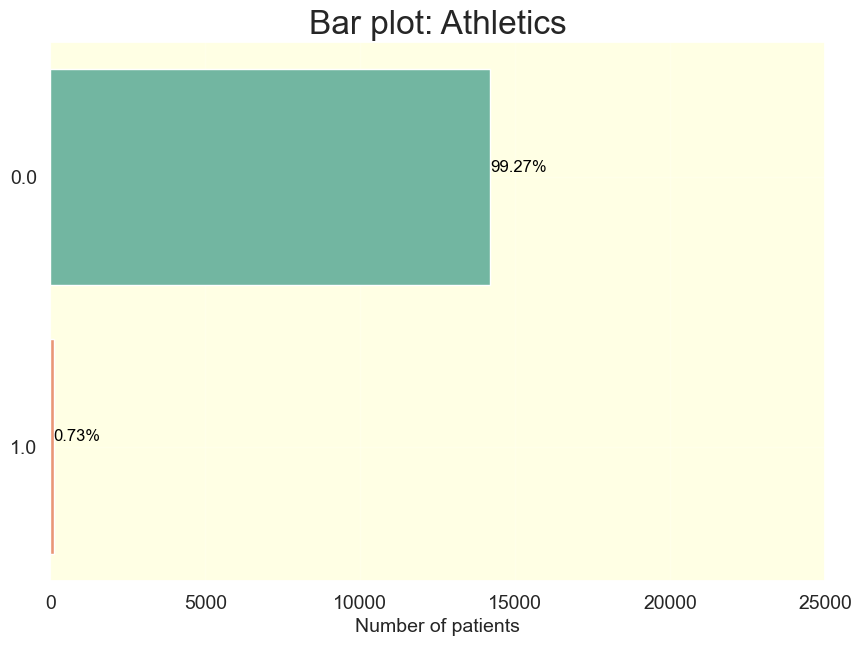

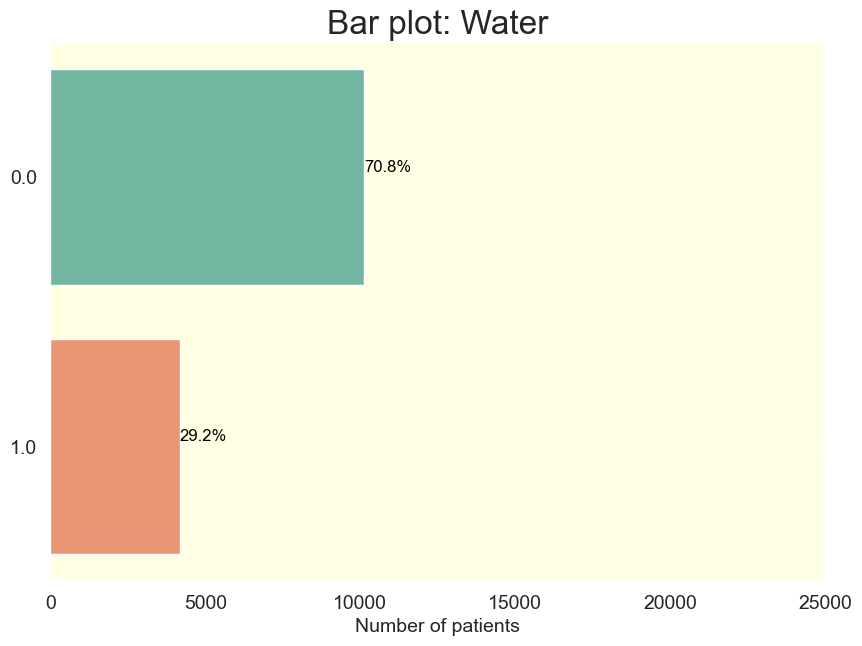

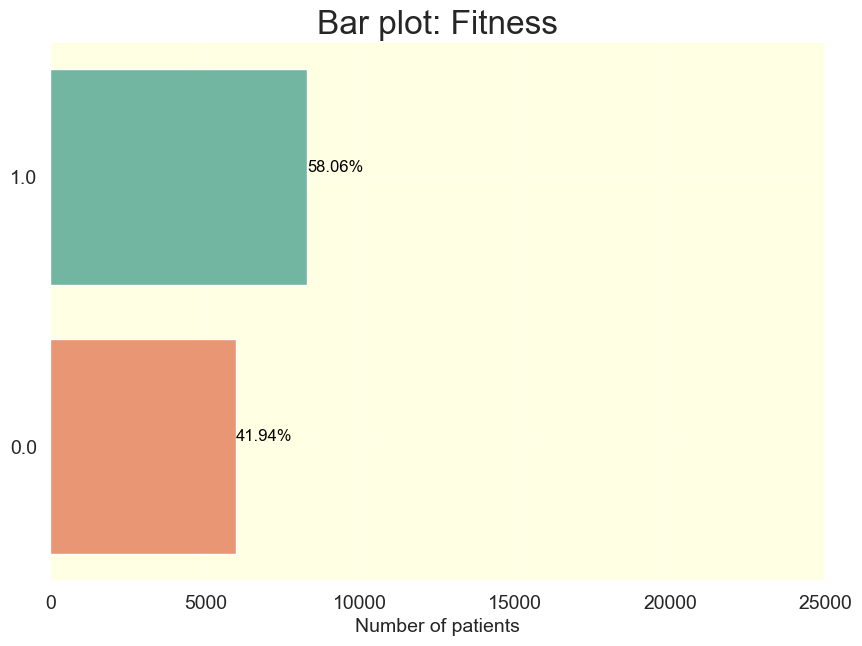

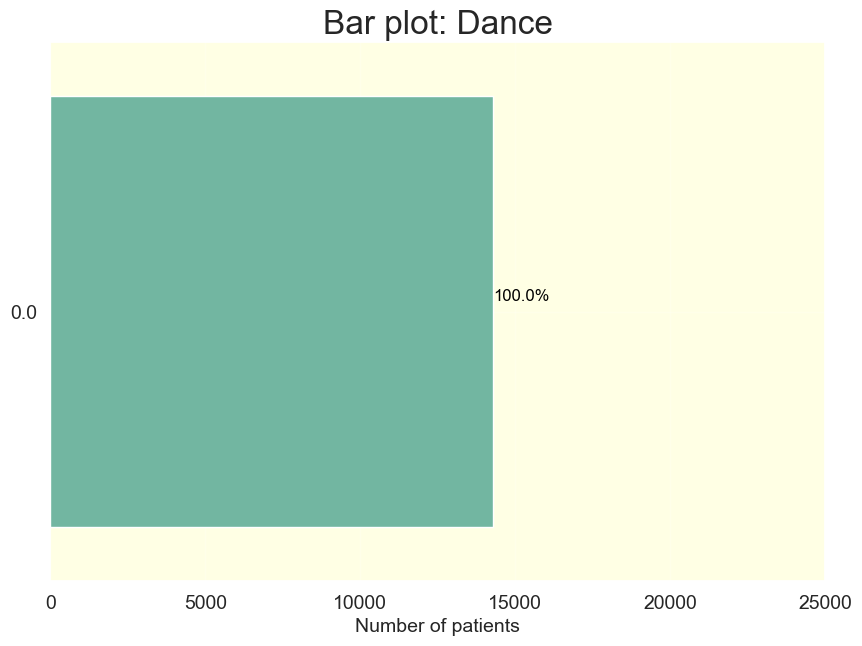

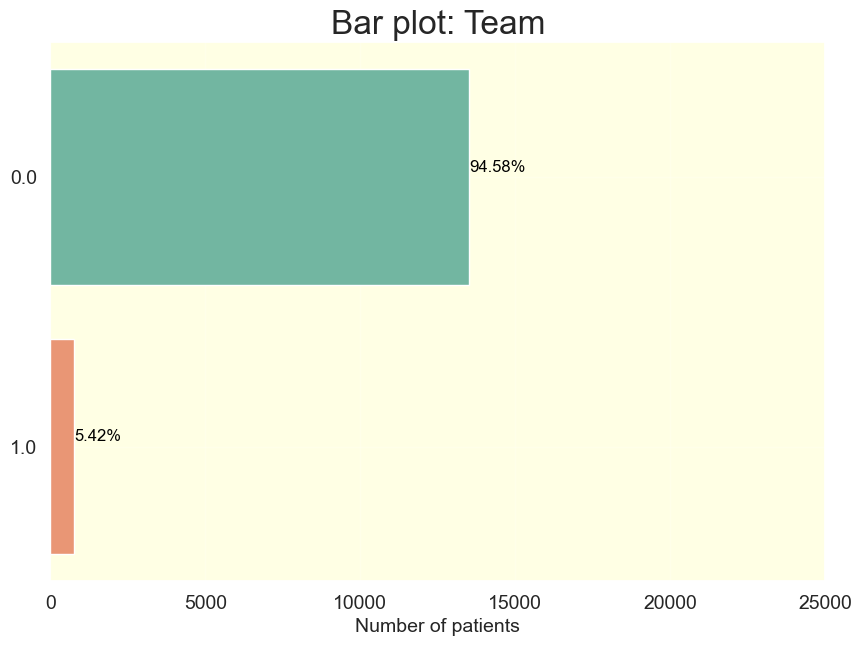

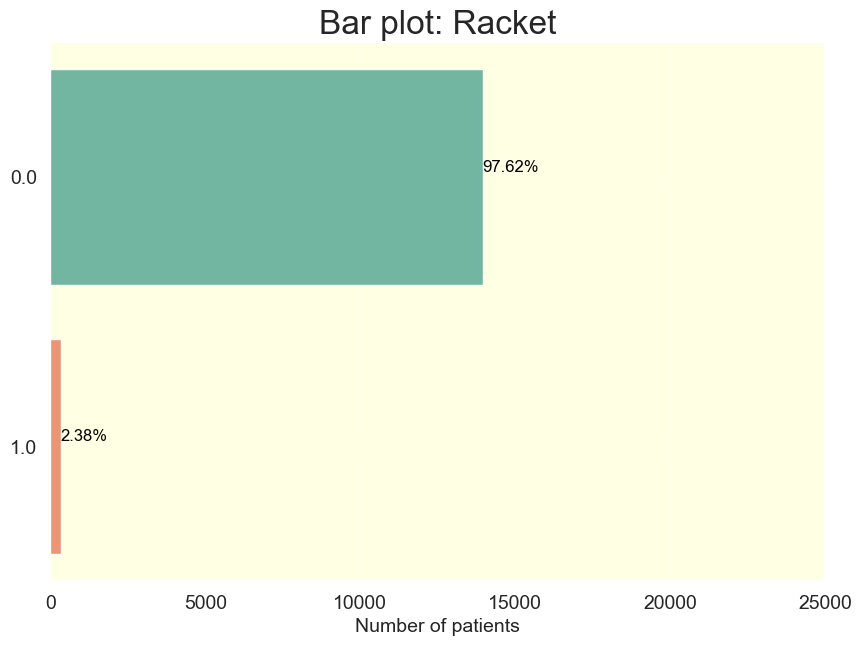

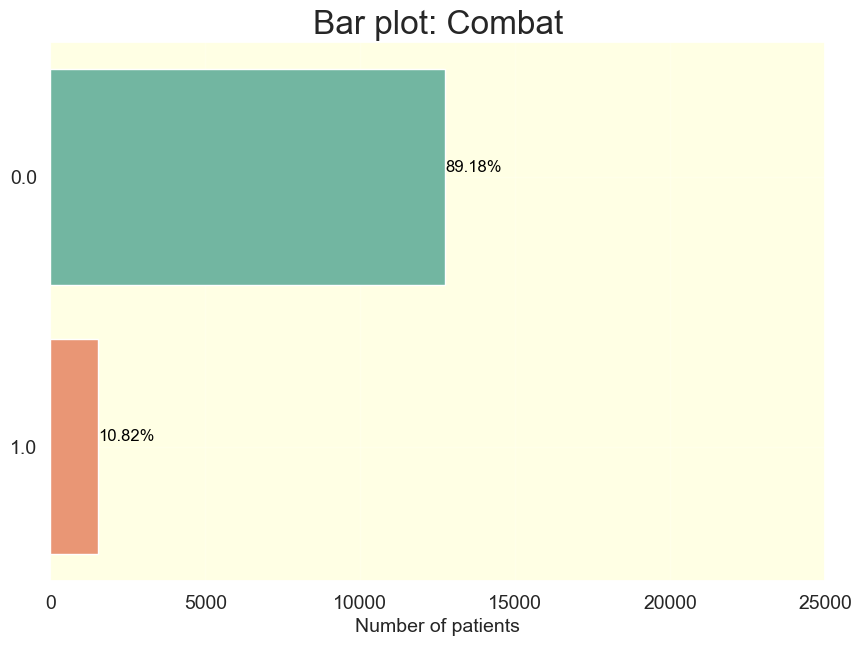

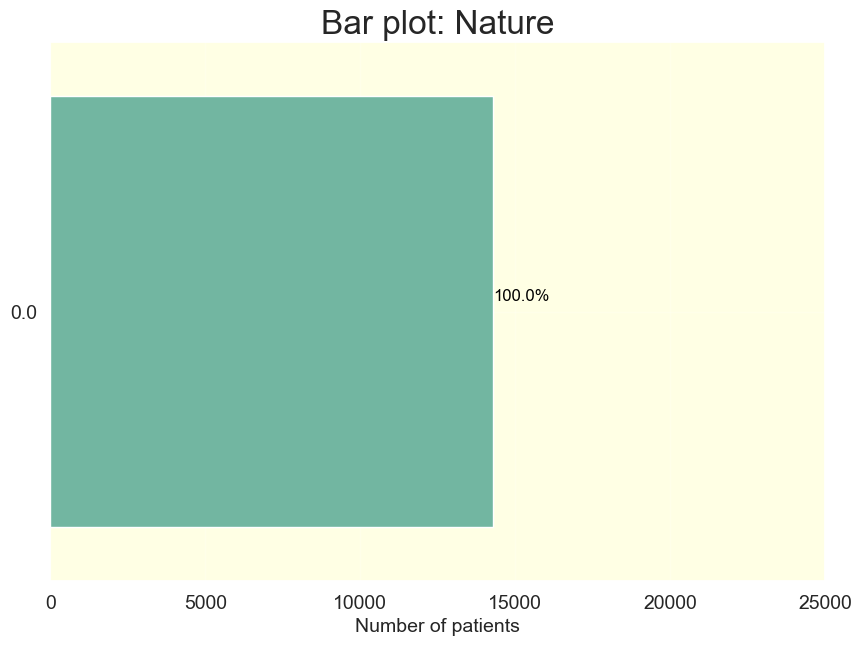

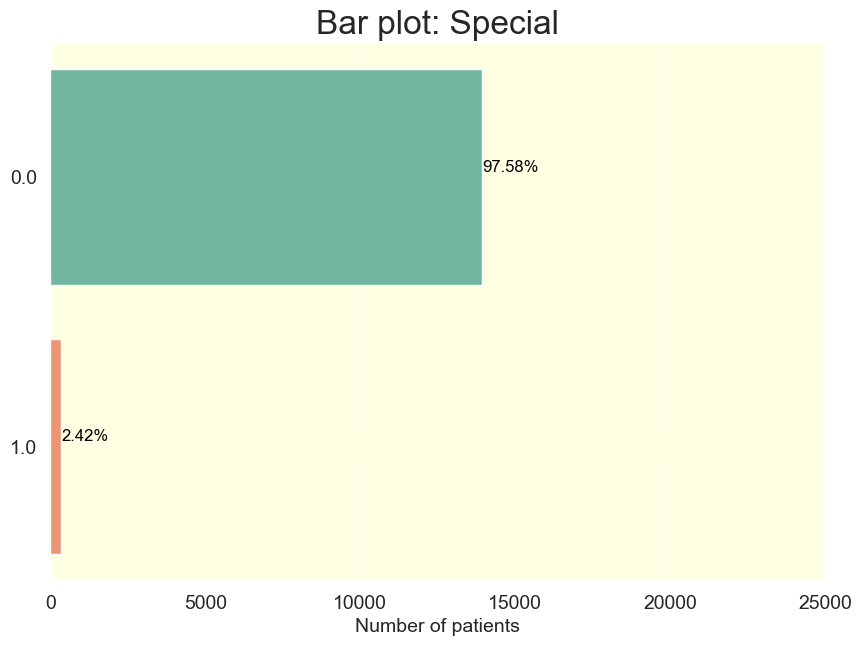

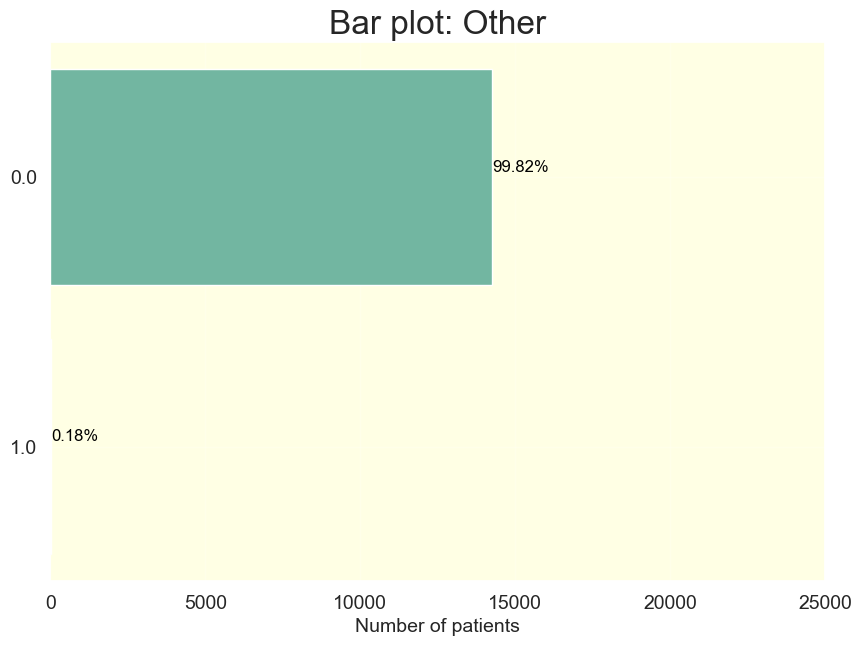

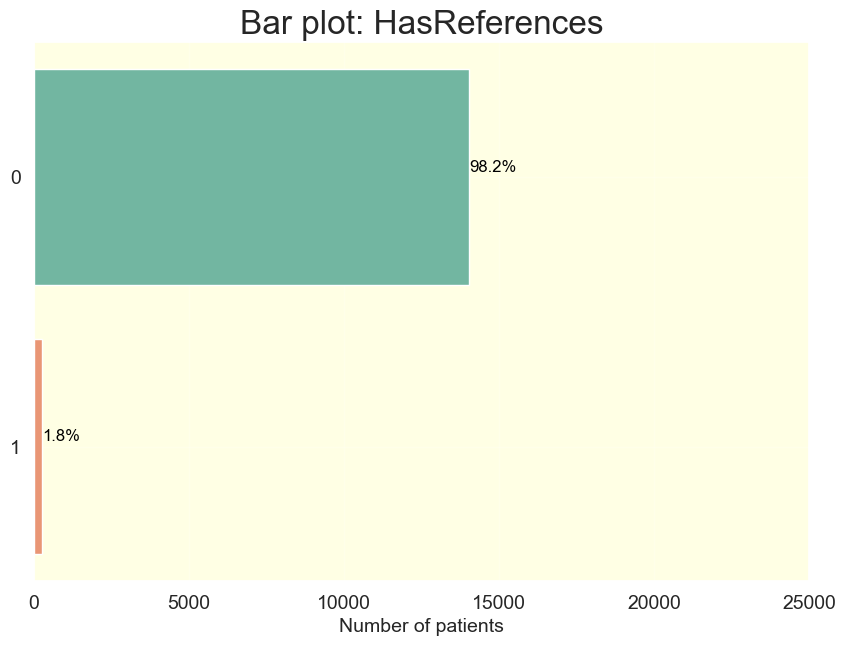

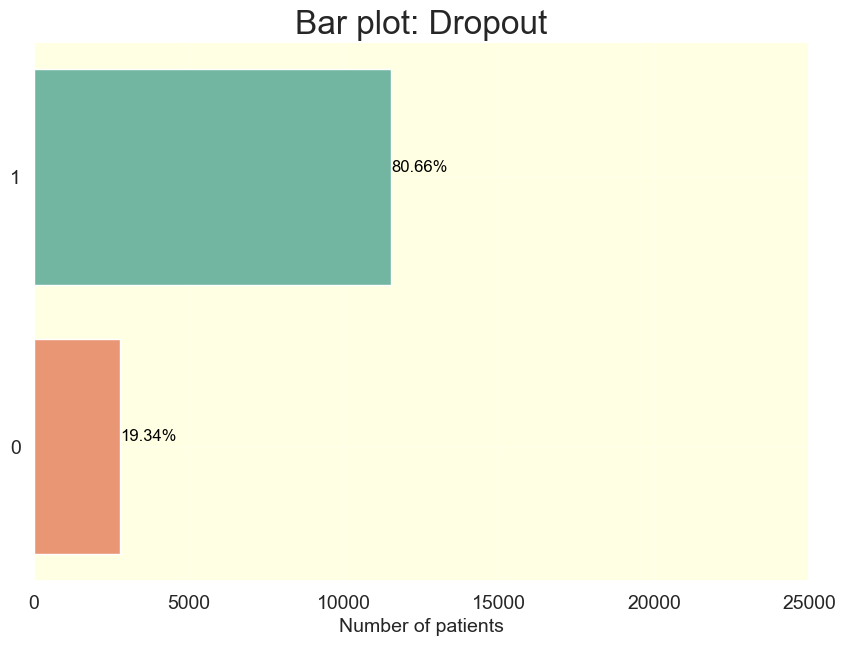

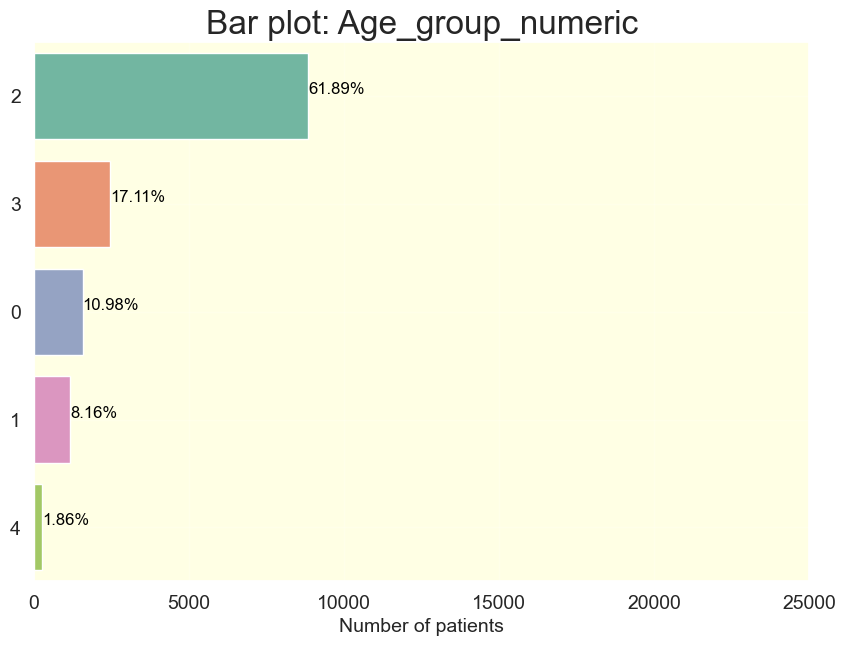

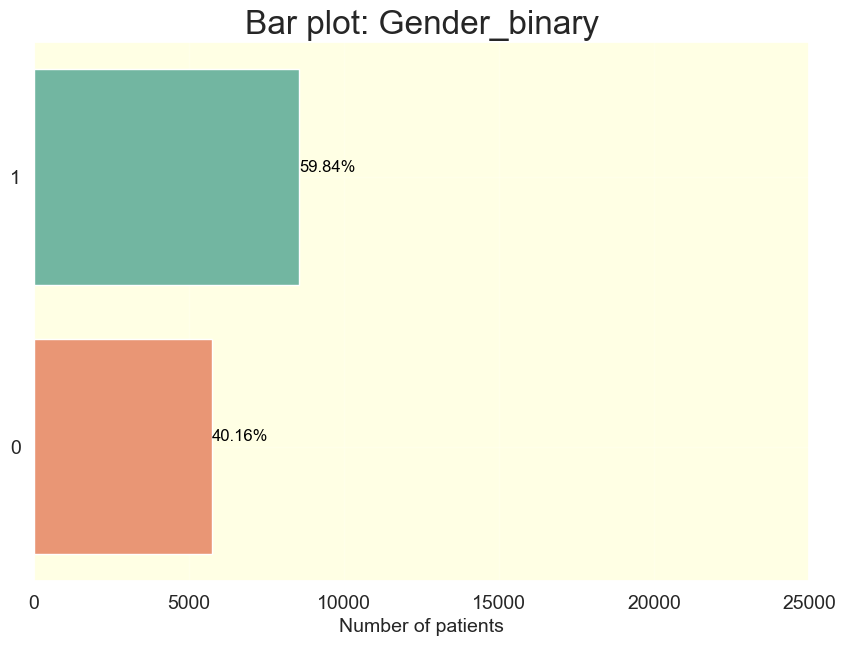

In [56]:
def plot_categorical_distribution(data, column):
    plt.figure(figsize=(10, 7))
    ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette="Set2")
    ax.set_alpha(0.8)
    ax.set_title("Bar plot: {}".format(column), fontsize=24)
    ax.set_xlabel("Number of patients", fontsize=14)
    ax.set_ylabel("")
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticks(range(0, 30000, 5000))
    ax.set_facecolor('xkcd:off white')
    ax.grid(alpha=0.2)

    # Add percentages to individual bars
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)

    for i in ax.patches:
        ax.text(i.get_width() + .3, i.get_y() + .38, str(round((i.get_width() / total) * 100, 2)) + '%', fontsize=12,
                color='black')

    plt.show()
    print()

# Loop through columns and generate plots
for col in new_non_metric_features:
    plot_categorical_distribution(data, col)

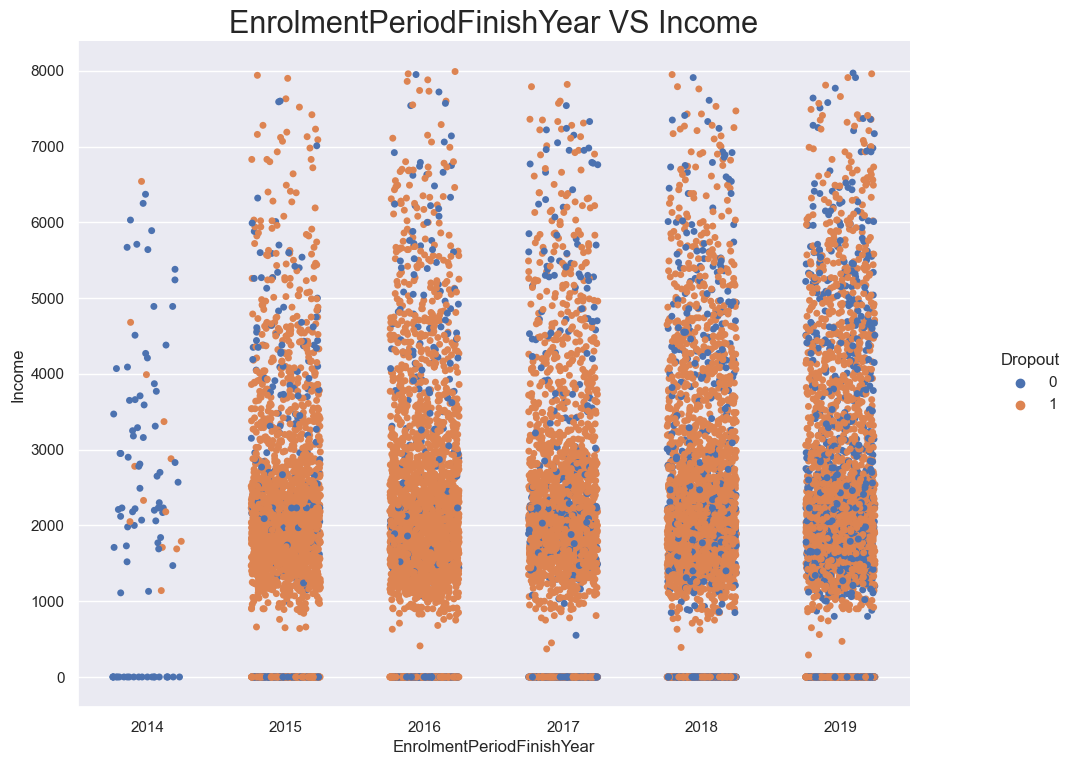

In [57]:
sns.catplot(x = "EnrolmentPeriodFinishYear", y = "Income", hue="Dropout", data=data, jitter = "0.25")
plt.gcf().set_size_inches(12, 8)
plt.title("EnrolmentPeriodFinishYear VS Income", fontsize = 22)
plt.show()

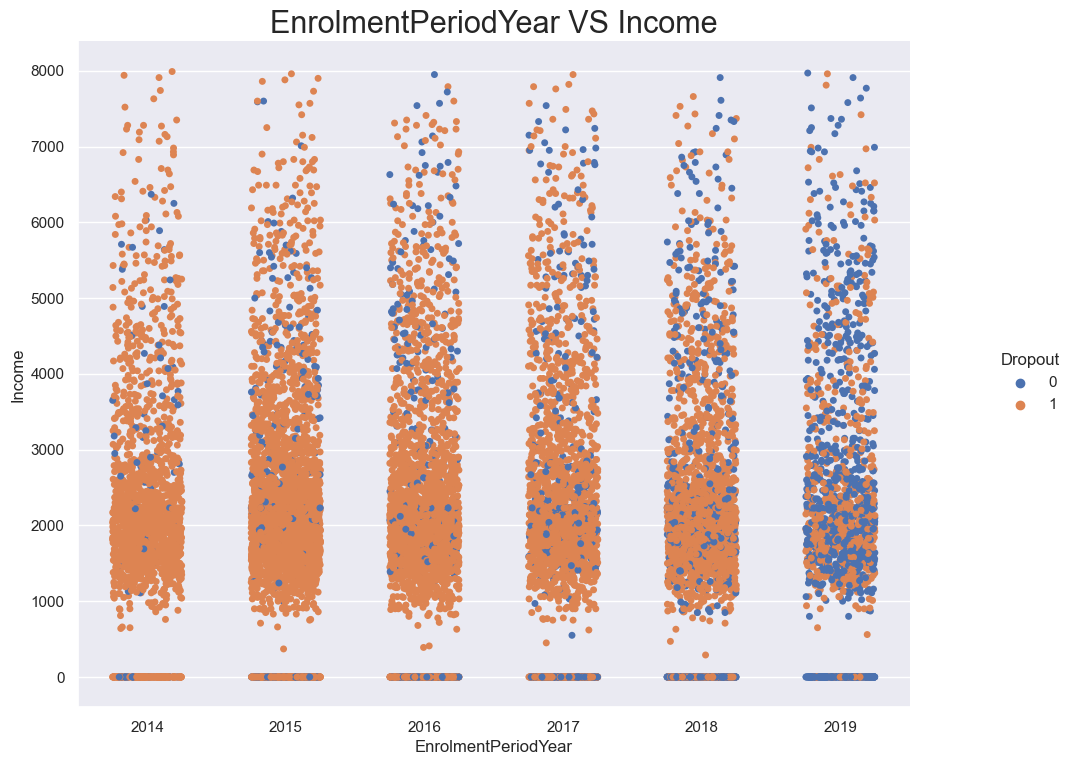

In [58]:
sns.catplot(x = "EnrolmentPeriodYear", y = "Income", hue="Dropout", data=data, jitter = "0.25")
plt.gcf().set_size_inches(12, 8)
plt.title("EnrolmentPeriodYear VS Income", fontsize = 22)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


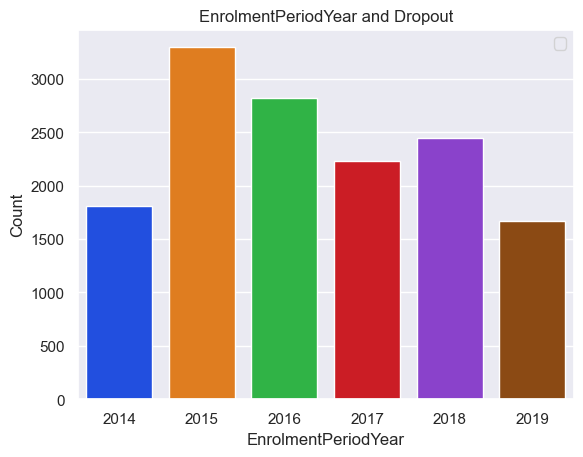

In [59]:
c =  sns.countplot(x = 'EnrolmentPeriodYear' , data = data, palette="bright" )
c.set(title='EnrolmentPeriodYear and Dropout')
c.set_ylabel('Count')
plt.legend(title = '')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


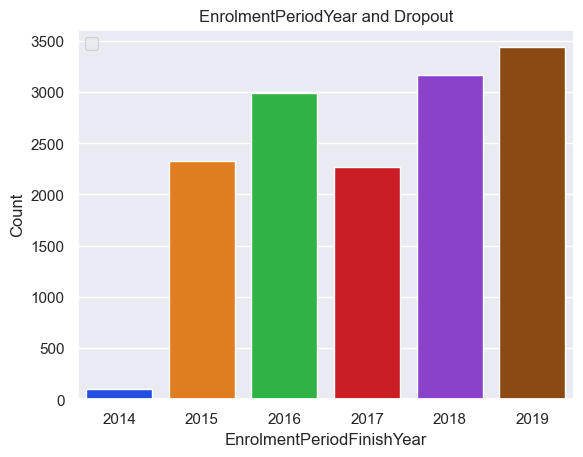

In [60]:
c =  sns.countplot(x = 'EnrolmentPeriodFinishYear', data = data, palette="bright" )
c.set(title='EnrolmentPeriodYear and Dropout')
c.set_ylabel('Count')
plt.legend(title = '')

In [61]:
sns.catplot(x = 'Age_group', y = "Income", hue= 'Combat', data=data, jitter = "0.25")
plt.gcf().set_size_inches(12, 8)
plt.title("Age_group VS Income", fontsize = 22)
plt.show()

ValueError: Could not interpret value `Age_group` for parameter `x`

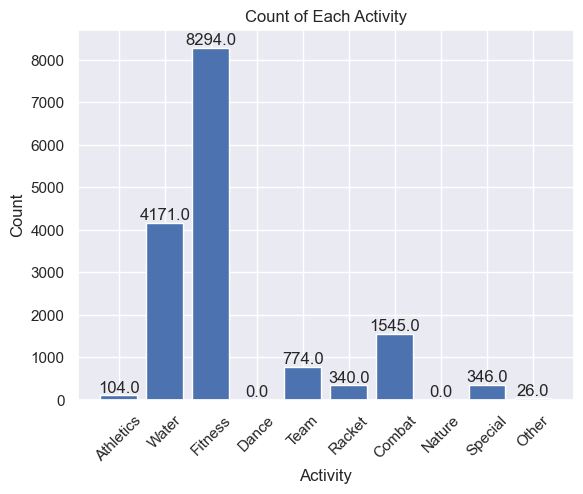

In [62]:
activities = data[['Athletics', 'Water', 'Fitness', 'Dance', 'Team', 'Racket', 'Combat', 'Nature', 'Special', 'Other']]

# Calculate the count of each activity
activity_counts = activities.sum()

# Create a bar plot
plt.bar(activity_counts.index, activity_counts.values)

for i, count in enumerate(activity_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Count of Each Activity")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

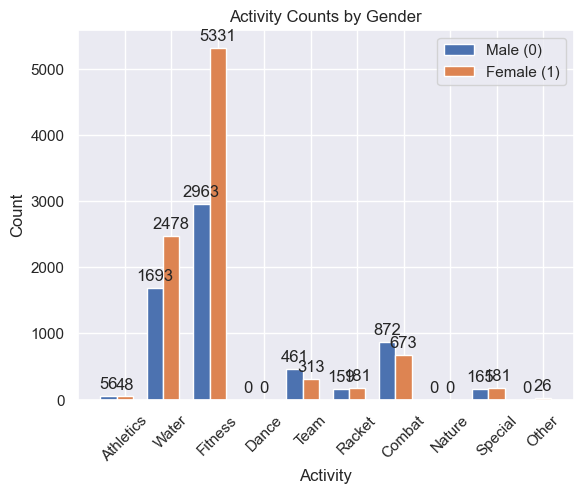

In [63]:
activities_gender = data[['Gender_binary','Athletics','Water', 'Fitness', 'Dance', 'Team', 'Racket', 'Combat', 'Nature','Special', 'Other']]
activity_counts = activities_gender.groupby('Gender_binary').sum()

# Define the activities and genders
activities = list(activity_counts.columns)
genders = ['Male (0)', 'Female (1)']  # You can replace these labels as needed


# Create a grouped bar chart
width = 0.35  # Width of each bar
x = range(len(activities))

fig, ax = plt.subplots()
for i, gender in enumerate(genders):
    bars = ax.bar(
        [pos + i * width for pos in x],
        activity_counts.loc[i],
        width,
        label=gender,
    )
    
    # Add labels above the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{int(height)}",  # Format the label as an integer
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # Offset for the label position
            textcoords="offset points",
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment
        )

# Add labels and title

plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Counts by Gender")
plt.xticks([pos + width for pos in x], activities)
ax.set_xticklabels(activities, rotation=45)


# Add a legend
ax.legend()

# Show the plot
plt.show()

In [64]:
c =  sns.countplot(x = 'Age_group', data = data, palette="deep" )
c.set(title='Number of people by group of age')
c.set_ylabel('Count')
plt.legend(title = '')

ValueError: Could not interpret input 'Age_group'

In [65]:
# Let's break this down, step by step (pandas plot - matplotlib behind)
sns.set()
df_counts = data\
    .groupby(['Age_group', 'Gender'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True)

KeyError: 'Age_group'

In [66]:
plt.scatter(data['Age'], data['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Gráfico de Barras')
plt.show()


KeyError: 'Age'

## Feature selection 

In [67]:
data['Dance'].value_counts() # Mensionar o facto de ninguem fazer dança

Dance
0.0    14284
Name: count, dtype: int64

In [68]:
data['Nature'].value_counts() # mencionar o facto de ninguem fazer desportos de natureza

Nature
0.0    14284
Name: count, dtype: int64

In [69]:
# Dar drop a estas duas são sempre a mesma coisa
data.drop('Nature',axis = 1, inplace = True)
data.drop('Dance', axis = 1, inplace = True)

new_non_metric_features.remove('Nature')
new_non_metric_features.remove('Dance')

#### Spearman Correlation 
Só para variaveis metricas

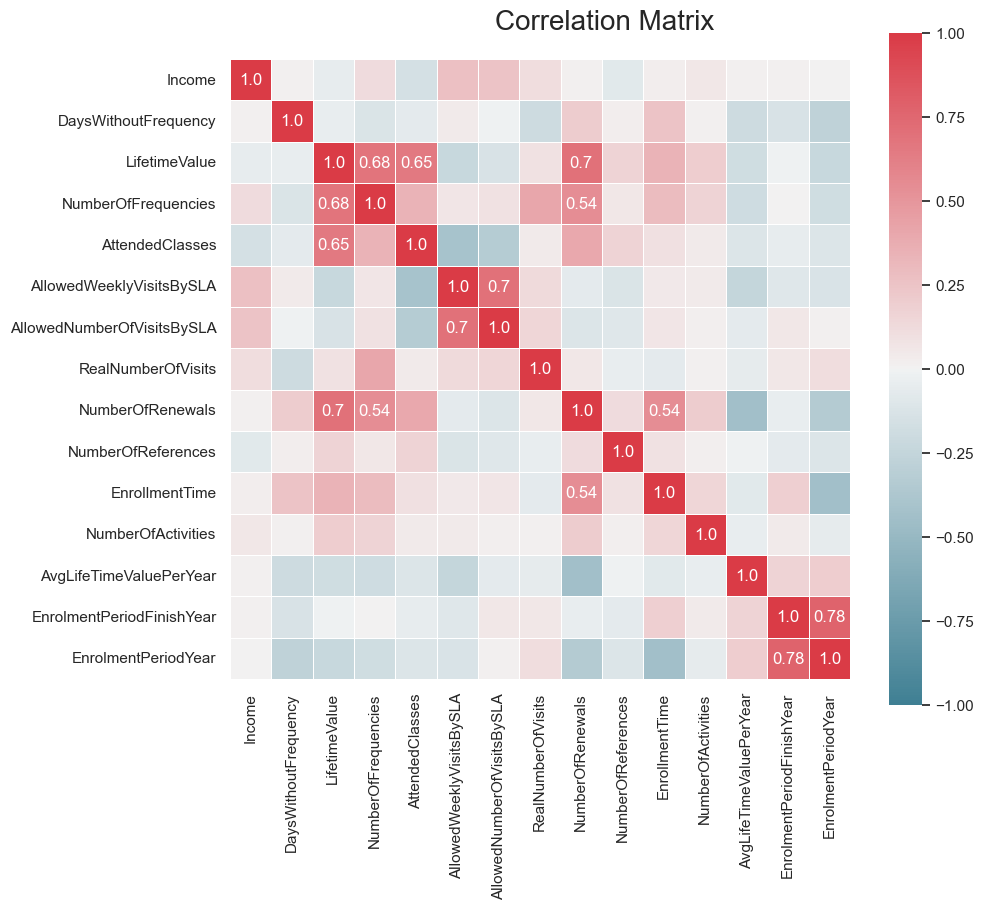

In [70]:
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[new_metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()


#Esta quereria dar drop ao income e ao has refences


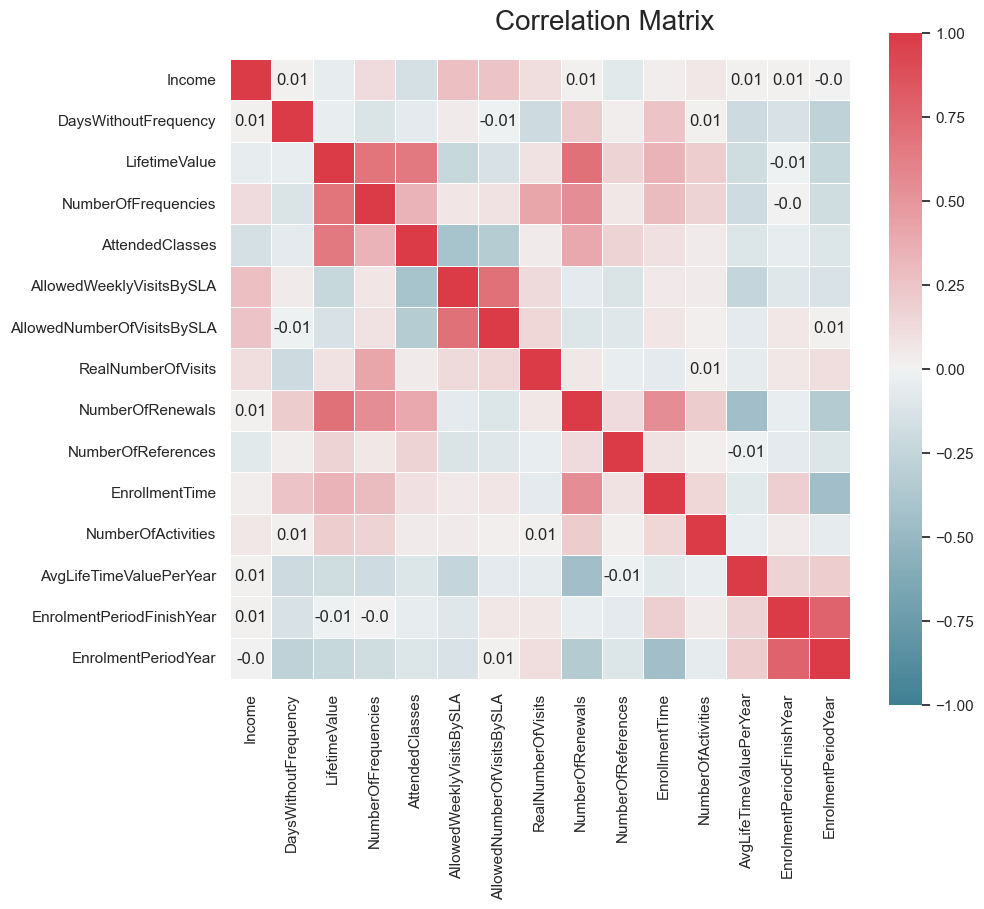

In [71]:
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[new_metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.logical_and(-0.02 < np.absolute(corr.values), np.absolute(corr.values) < 0.02)
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()


#Esta quereria dar drop ao income e ao has refences


In [72]:
data.drop(columns=['Income'], axis = 1, inplace = True) 

new_metric_features.remove('Income')


### Data Normalization

##### MinMax scaler

In [73]:
df_minmax = data.copy()

In [74]:
data.dtypes

EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                   int64
LifetimeValue                        float64
UseByTime                              int64
Athletics                            float64
Water                                float64
Fitness                              float64
Team                                 float64
Racket                               float64
Combat                               float64
Special                              float64
Other                                float64
NumberOfFrequencies                  float64
AttendedClasses                        int64
AllowedWeeklyVisitsBySLA               int32
AllowedNumberOfVisitsBySLA           float64
RealNumberOfVisits                     int64
NumberOfRenewals                       int64
HasReferen

In [75]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_minmax[new_metric_features])
scaled_feat

array([[7.18390805e-04, 4.48184189e-02, 1.08991826e-02, ...,
        1.01896250e-01, 1.00000000e+00, 1.00000000e+00],
       [4.31034483e-02, 2.40369181e-01, 2.99727520e-02, ...,
        7.96392341e-02, 2.00000000e-01, 0.00000000e+00],
       [5.02873563e-03, 1.88603531e-02, 6.81198910e-03, ...,
        8.29011319e-02, 6.00000000e-01, 6.00000000e-01],
       ...,
       [1.43678161e-03, 2.18699839e-02, 6.81198910e-03, ...,
        9.61299395e-02, 6.00000000e-01, 6.00000000e-01],
       [2.15517241e-03, 3.95565811e-01, 2.50681199e-01, ...,
        0.00000000e+00, 8.00000000e-01, 8.00000000e-01],
       [1.00574713e-02, 4.61276083e-01, 2.28882834e-01, ...,
        5.21668062e-02, 1.00000000e+00, 4.00000000e-01]])

In [76]:
#df_minmax.drop(columns='Gender',inplace = True)

In [77]:
df_minmax

EnrollmentStart EnrollmentFinish LastPeriodStart LastPeriodFinish  \
ID                                                                        
10000      2019-09-03       2019-10-31      2019-07-01       2019-12-31   
10001      2014-08-12       2015-09-14      2015-01-01       2015-12-31   
10002      2017-05-02       2017-06-01      2017-01-01       2017-06-30   
10003      2018-09-05       2019-02-12      2018-07-01       2019-06-30   
10005      2015-12-01       2016-07-31      2016-01-01       2016-12-31   
...               ...              ...             ...              ...   
24937      2016-09-08       2016-09-08      2019-07-01       2019-12-31   
24938      2015-09-17       2016-06-04      2016-01-01       2016-06-30   
24939      2017-03-01       2017-03-31      2017-01-01       2017-06-30   
24940      2018-03-01       2018-03-01      2019-07-01       2019-12-31   
24941      2016-04-01       2019-06-11      2019-01-01       2019-06-30   

      DateLastVisit  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                    
10000    2019-10-30                     1          89.35          0   
10001    2015-07-16                    60         479.20          0   
10002    2017-05-25                     7          37.60          0   
10003    2019-01-21                    22         155.40          0   
10005    2016-07-28                     3         140.00          0   
...             ...                   ...            ...        ...   
24937    2019-10-29                     2        1460.45          0   
24938    2016-04-27                    38         343.85          0   
24939    2017-03-29                     2          43.60          0   
24940    2019-10-28                     3         788.60          0   
24941    2019-05-28                    14         919.60          0   

       Athletics  Water  ...  HasReferences  NumberOfReferences  Dropout  \
ID                       ...                                               
10000        0.0    0.0  ...              0                   0        0   
10001        0.0    0.0  ...              0                   0        1   
10002        0.0    0.0  ...              0                   0        1   
10003        0.0    0.0  ...              0                   0        1   
10005        0.0    0.0  ...              0                   0        1   
...          ...    ...  ...            ...                 ...      ...   
24937        0.0    1.0  ...              0                   0        0   
24938        0.0    0.0  ...              0                   0        1   
24939        0.0    0.0  ...              0                   0        1   
24940        0.0    1.0  ...              0                   0        0   
24941        0.0    0.0  ...              0                   0        1   

       Age_group_numeric  Gender_binary  EnrollmentTime  NumberOfActivities  \
ID                                                                            
10000                  3              1              58                 1.0   
10001                  2              1             398                 1.0   
10002                  2              0              30                 1.0   
10003                  0              0             160                 1.0   
10005                  2              1             243                 1.0   
...                  ...            ...             ...                 ...   
24937                  1              0               0                 1.0   
24938                  3              0             261                 1.0   
24939                  2              0              30                 1.0   
24940                  3              0               0                 1.0   
24941                  2              1            1166                 1.0   

       AvgLifeTimeValuePerYear  EnrolmentPeriodFinishYear  EnrolmentPeriodYear  
ID      

In [78]:
from sklearn.cluster import KMeans
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_minmax)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>)